In [929]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels
from warnings import filterwarnings
filterwarnings("ignore")

In [930]:
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Seaborn version:',sns.__version__)
print('Matplotlib version:',matplotlib.__version__)
print('Sklearn version:',sklearn.__version__)
print('Statsmodels version:',statsmodels.__version__)

Numpy version: 1.20.1
Pandas version: 1.2.4
Seaborn version: 0.11.1
Matplotlib version: 3.3.4
Sklearn version: 0.23.1
Statsmodels version: 0.13.2


### 1.Read the data as an appropriate Time Series data and plot the data.

In [931]:
df = pd.read_csv('Rose.csv')
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [932]:
Time_Stamp = pd.date_range(start='1980-01-01',periods=len(df),freq='M')
Time_Stamp

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [933]:
df['Time_Stamp'] = Time_Stamp
df.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [934]:
df.set_index('Time_Stamp',inplace=True,drop='Time_Stamp')
df.drop(labels='YearMonth', axis=1, inplace=True)
df.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


### Plotting the Time Series to understand the behaviour of the data.

In [935]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

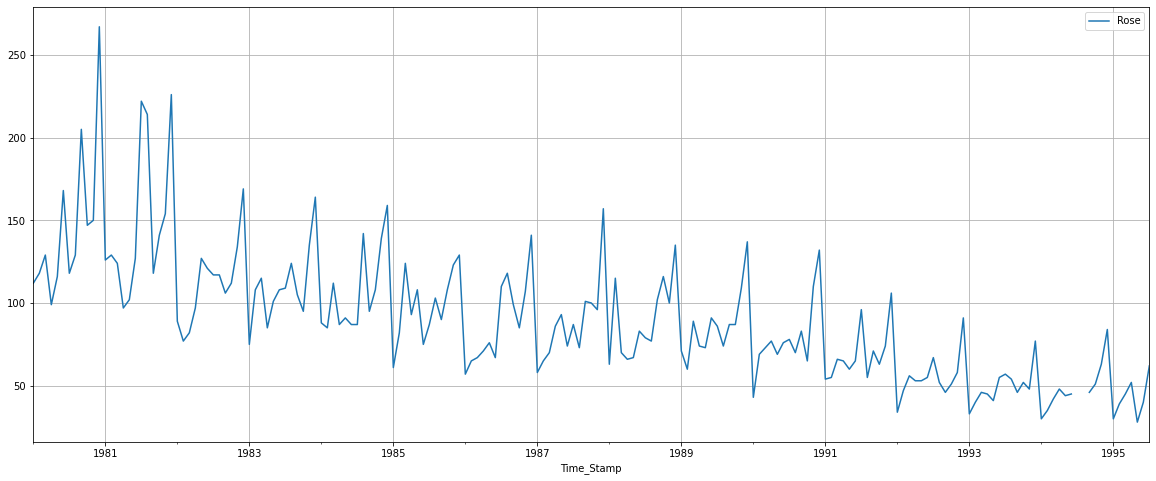

In [936]:
df.plot(grid=True);

We can see that there is a trend with a seasonal pattern associated as well.

### Check the basic measures of descriptive statistics

In [937]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


The basic measures of descriptive statistics tell us how the Rose have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

### 2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

### Plotting the boxplot to understand the spread  of accidents across different years and within different months across years.
### Yearly Boxplot

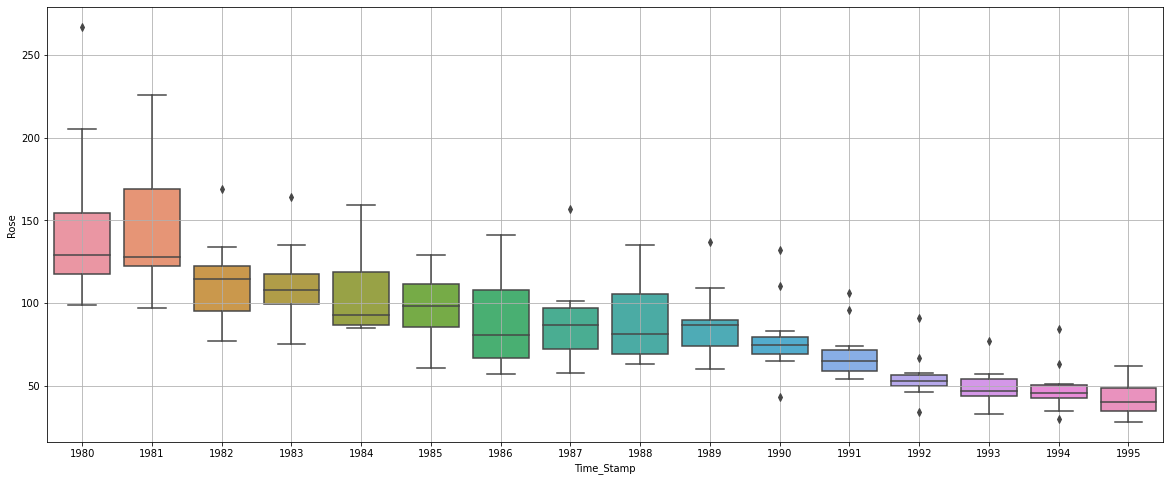

In [938]:
sns.boxplot(x = df.index.year,y = df['Rose'])
plt.grid();

The yearly boxplots also shows that the Rose have decreased towards the last few years.

### Year Plot

Let us try to resample or aggregate the Time Series from an annual perspective and sum up the observations of each month.

In [939]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

,Rose
Time_Stamp,
1980-12-31,1758.0
1981-12-31,1780.0
1982-12-31,1348.0
1983-12-31,1324.0
1984-12-31,1280.0


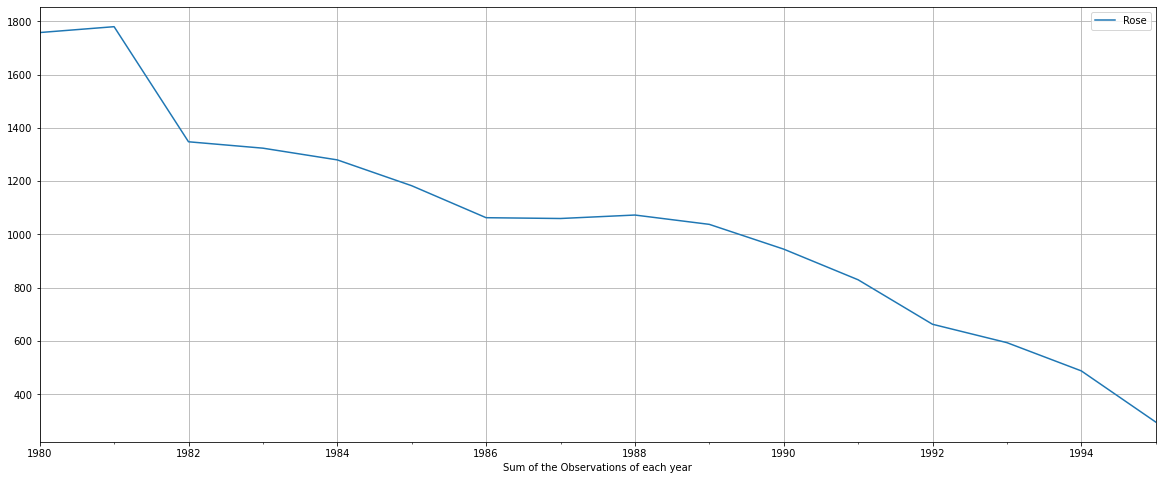

In [940]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

Let us try to resample or aggregate the Time Series from an annual perspective and take the mean of the observations of the year considering each month as an observation.

In [941]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

,Rose
Time_Stamp,
1980-12-31,146.500000
1981-12-31,148.333333
1982-12-31,112.333333
1983-12-31,110.333333
1984-12-31,106.666667


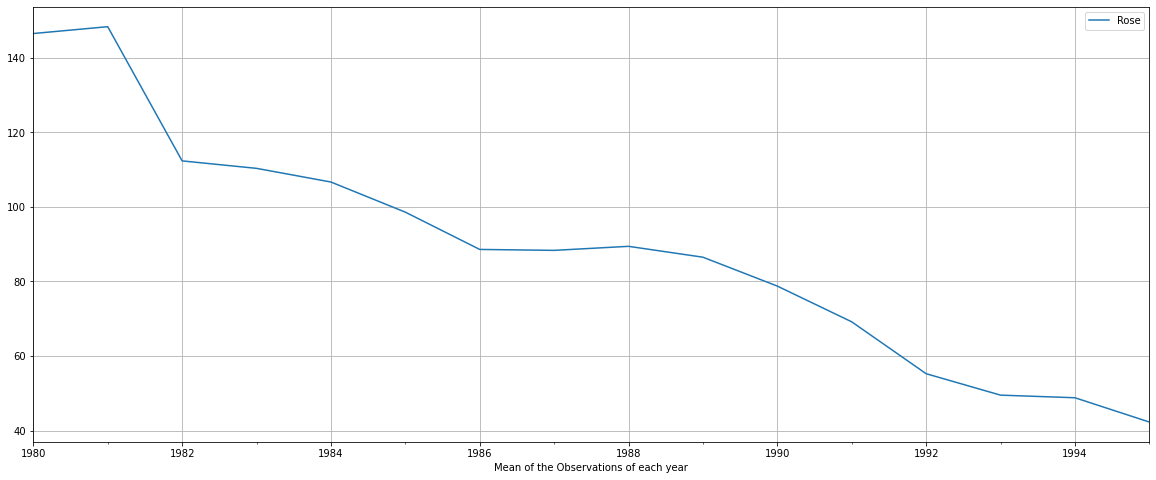

In [942]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

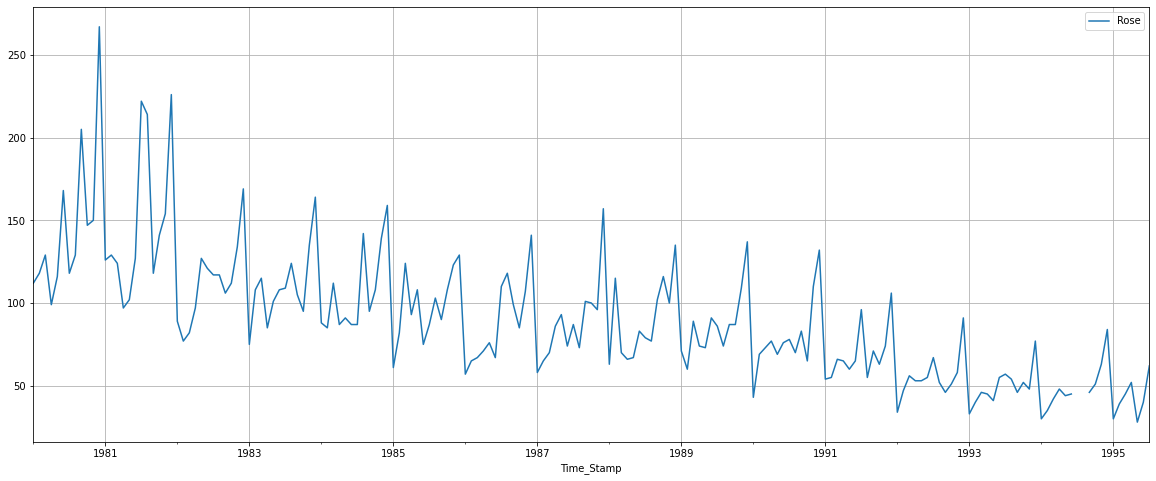

In [943]:
df.plot()
plt.grid();

The resampled yearly or annual series have smoothened out the seasonality and have only been able to capture the year on year trend where there was.

### Quarterly Plot

In [944]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

,Rose
Time_Stamp,
1980-03-31,359.0
1980-06-30,383.0
1980-09-30,452.0
1980-12-31,564.0
1981-03-31,379.0


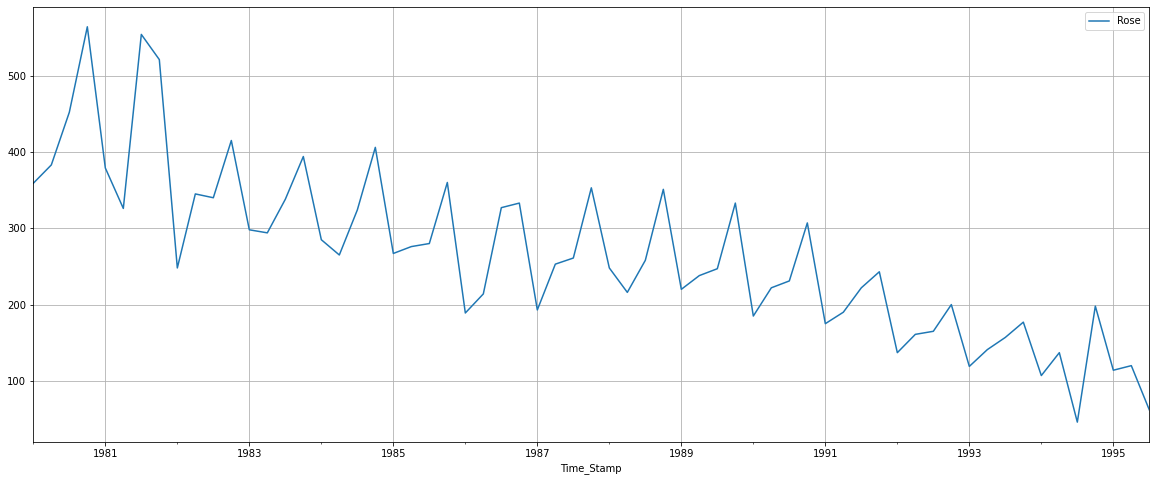

In [945]:
df_quarterly_sum.plot();
plt.grid()

In [946]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

,Rose
Time_Stamp,
1980-03-31,119.666667
1980-06-30,127.666667
1980-09-30,150.666667
1980-12-31,188.000000
1981-03-31,126.333333


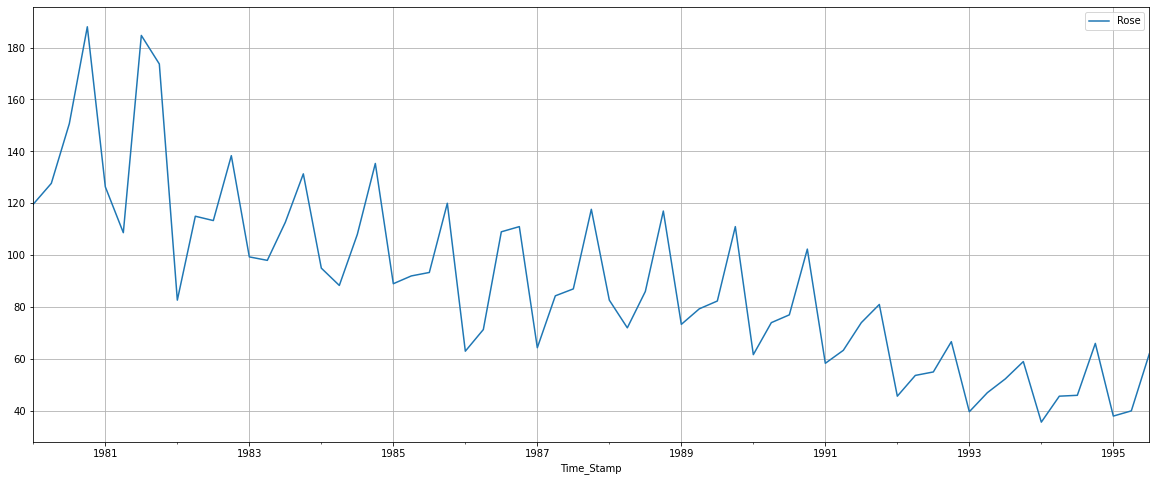

In [947]:
df_quarterly_mean.plot();
plt.grid()

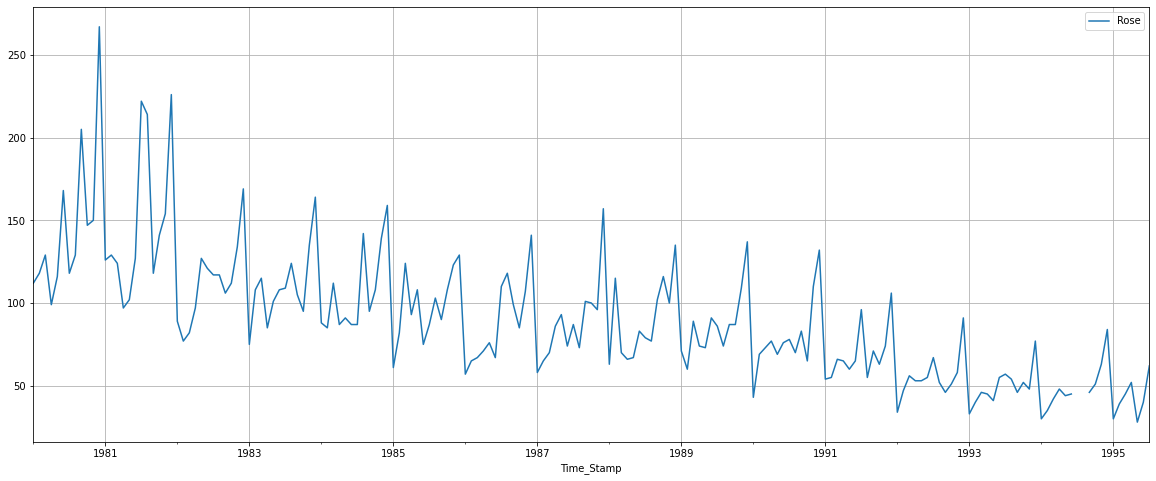

In [948]:
df.plot()
plt.grid();

We see that the year on year quarterly series represents the year on year monthly series. The quarterly series is able to catch the seasonality in the data.

### Daily Plot

Now, let us try to understand the data from a daily perspective

In [949]:
df_daily_sum = df.resample('D').sum()
df_daily_sum

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-01,0.0
1980-02-02,0.0
1980-02-03,0.0
1980-02-04,0.0
...,...
1995-07-27,0.0
1995-07-28,0.0
1995-07-29,0.0


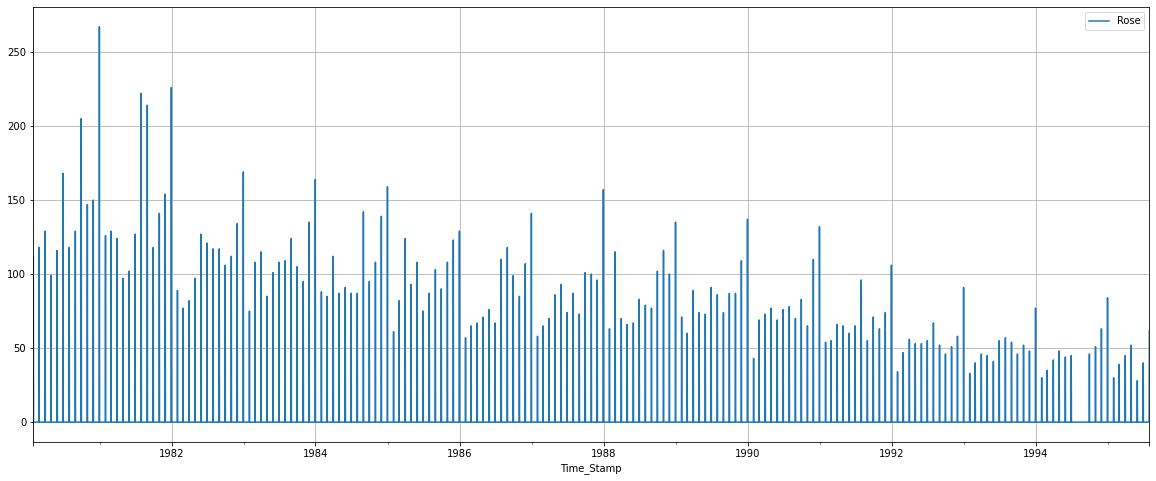

In [950]:
df_daily_sum.plot()
plt.grid();

The above graph fails to give us a proper understanding of our data. Thus, resampling the data to intervals where a number of observations are 0 is not a good idea as that does not give us an understanding of the performance of the time series.

To get a very high-level overview of the trend of the Time Series Data (if Trend is present) can be understood by resampling the data keeping the intervals very large.

### Decade Plot

In [951]:
df_decade_sum = df.resample('10Y').sum()
df_decade_sum

,Rose
Time_Stamp,
1980-12-31,1758.0
1990-12-31,12094.0
2000-12-31,2871.0


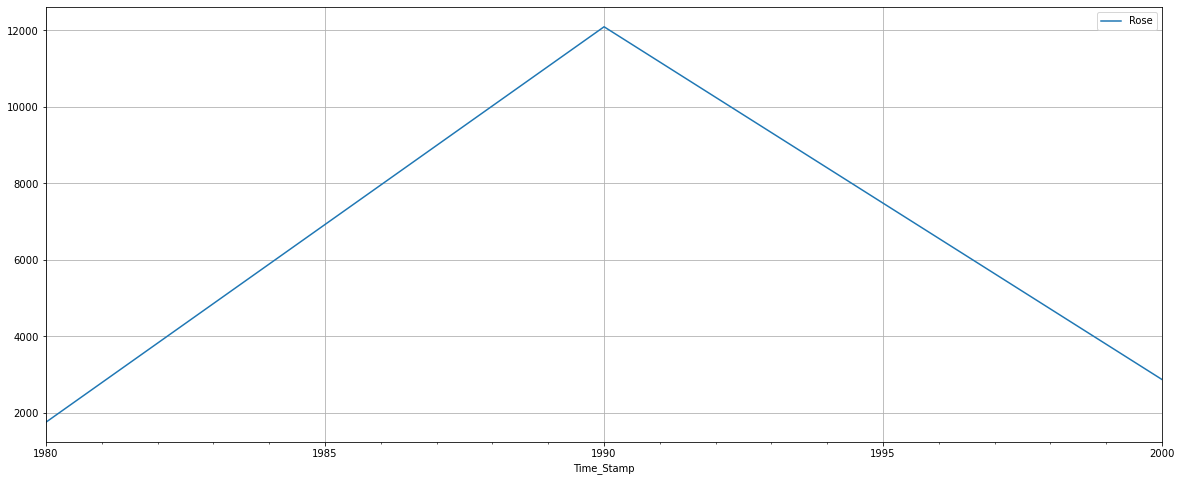

In [952]:
df_decade_sum.plot();
plt.grid()

If we take the resampling period to be 10 years or a decade, we see that the seasonality present has been smoothed over and it is only giving an estimate of the trend.

### Monthly BoxPlot

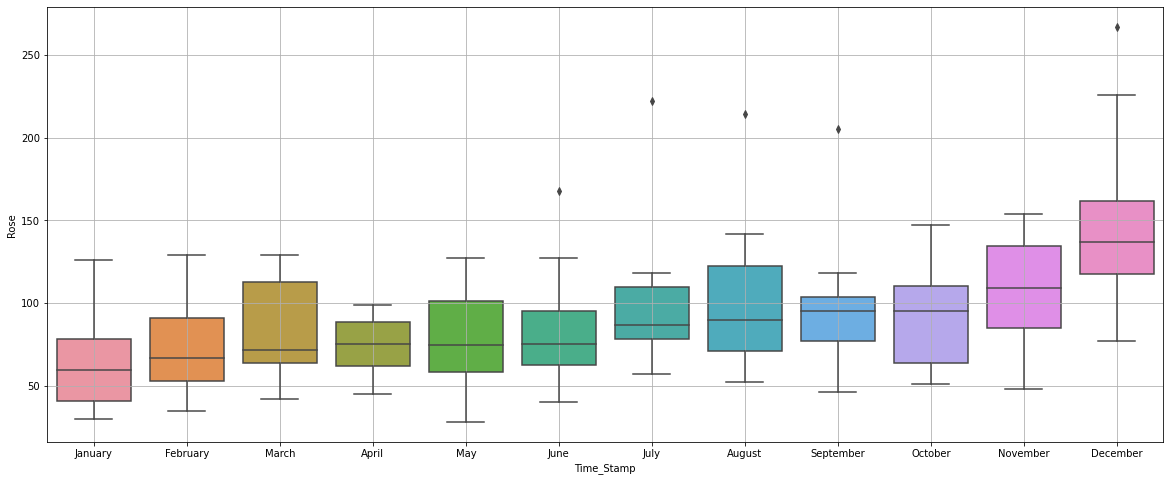

In [953]:
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();

There is a clear distinction of 'Rose' within different months spread across various years. The highest such numbers are being recorded in the month of November-December across various years.

### Plot a time series monthplot to understand the spread of accidents across different years and within different months across years.

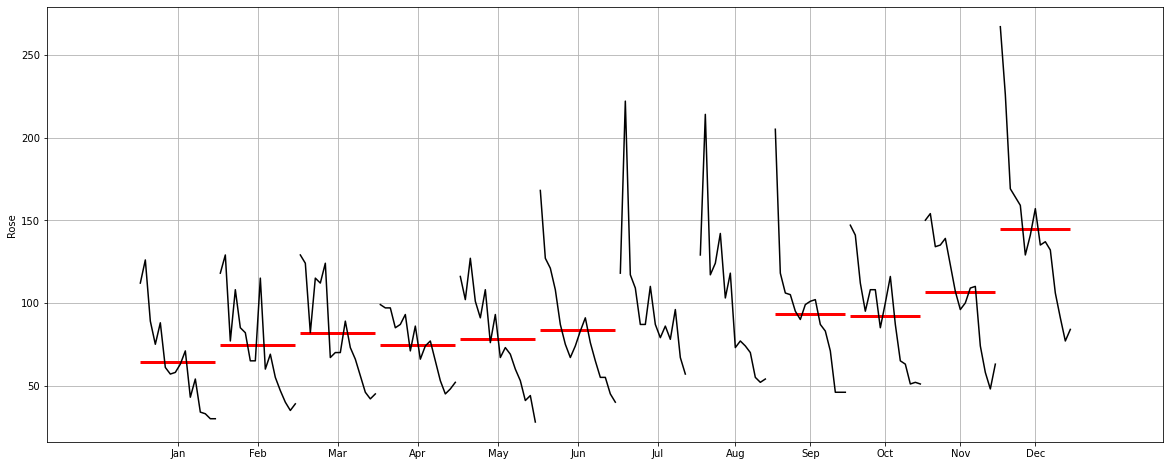

In [954]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Rose'],ylabel='Rose')
plt.grid();

This plot shows us the behaviour of the Time Series ('Rose' in this case) across various months. The red line is the median value.

### Plot a graph of monthly Rose across years.

In [955]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


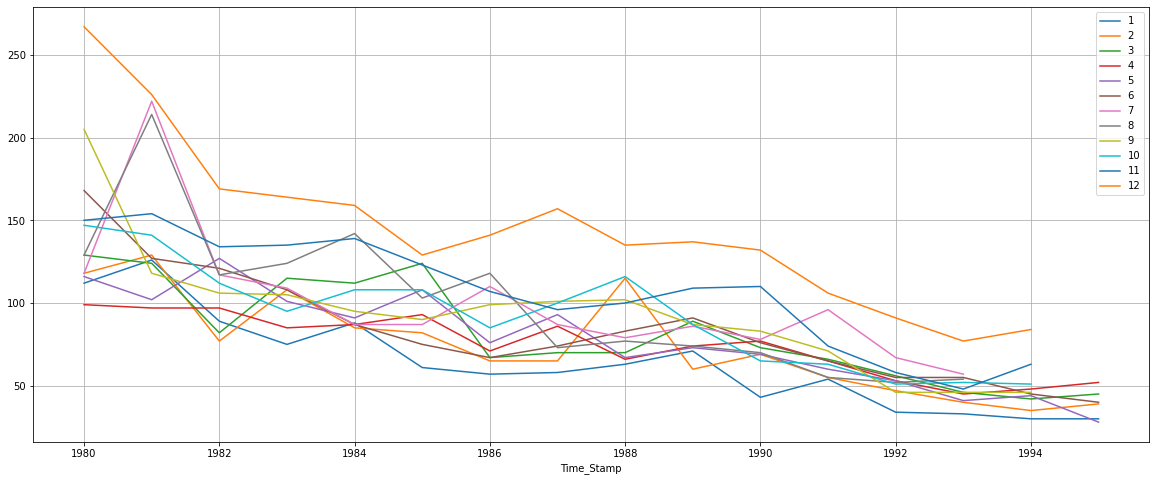

In [956]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

### Plot the Empirical Cumulative Distribution.

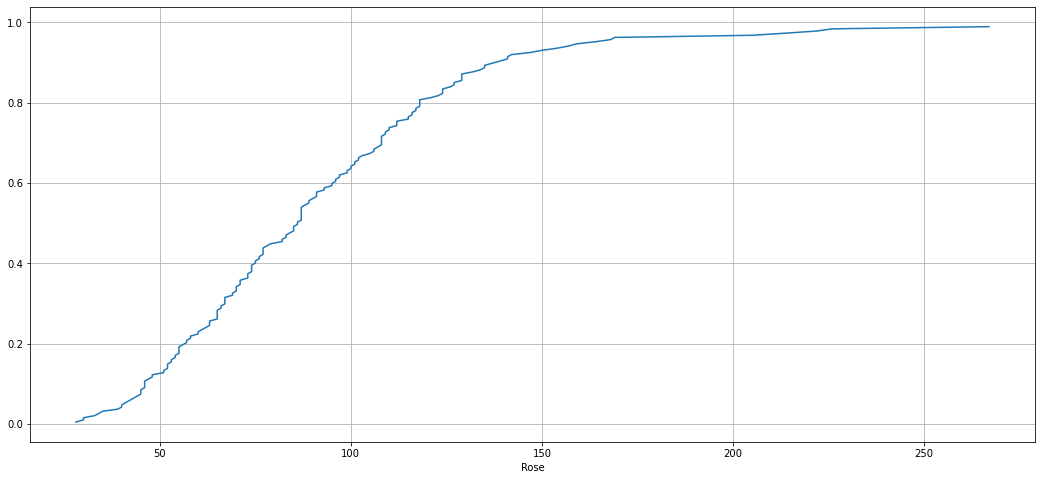

In [957]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Rose');

This particular graph tells us what percentage of data points refer to what number of Rose.

### Plot the average Rose per month and the month on month percentage change of Rose.

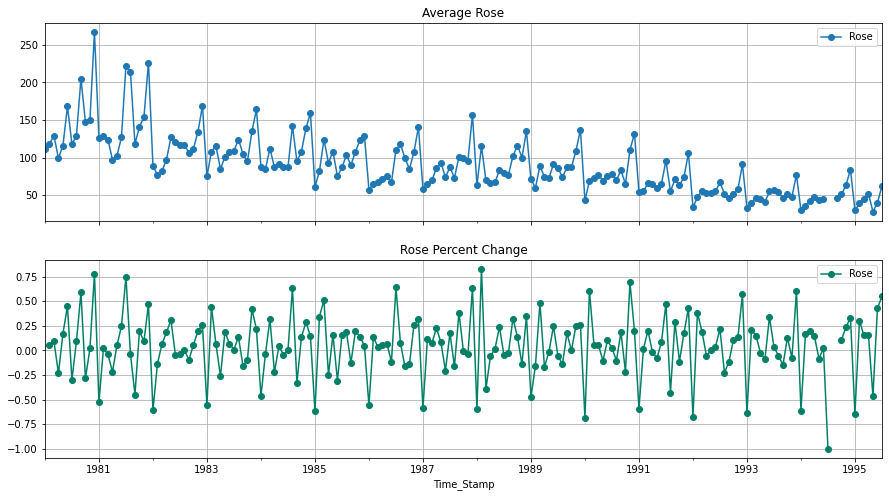

In [958]:
# group by date and get average Rose, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Rose over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Rose over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Percent Change",grid=True)

The above two graphs tells us the Average 'Rose' and the Percentage change of 'Rose' with respect to the time.

### Imputing the missing values

In [959]:
df['1994']

,Rose
Time_Stamp,
1994-01-31,30.0
1994-02-28,35.0
1994-03-31,42.0
1994-04-30,48.0
1994-05-31,44.0
1994-06-30,45.0
1994-07-31,NaN
1994-08-31,NaN
1994-09-30,46.0


In [960]:
df['1994']=df.interpolate()['1994']

In [961]:
df.isnull().sum()

Rose    0
dtype: int64

In [962]:
df.shape

(187, 1)

In [963]:
df['1994']

,Rose
Time_Stamp,
1994-01-31,30.000000
1994-02-28,35.000000
1994-03-31,42.000000
1994-04-30,48.000000
1994-05-31,44.000000
1994-06-30,45.000000
1994-07-31,45.333333
1994-08-31,45.666667
1994-09-30,46.000000


### Decompose the Time Series and plot the different components.

In [964]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

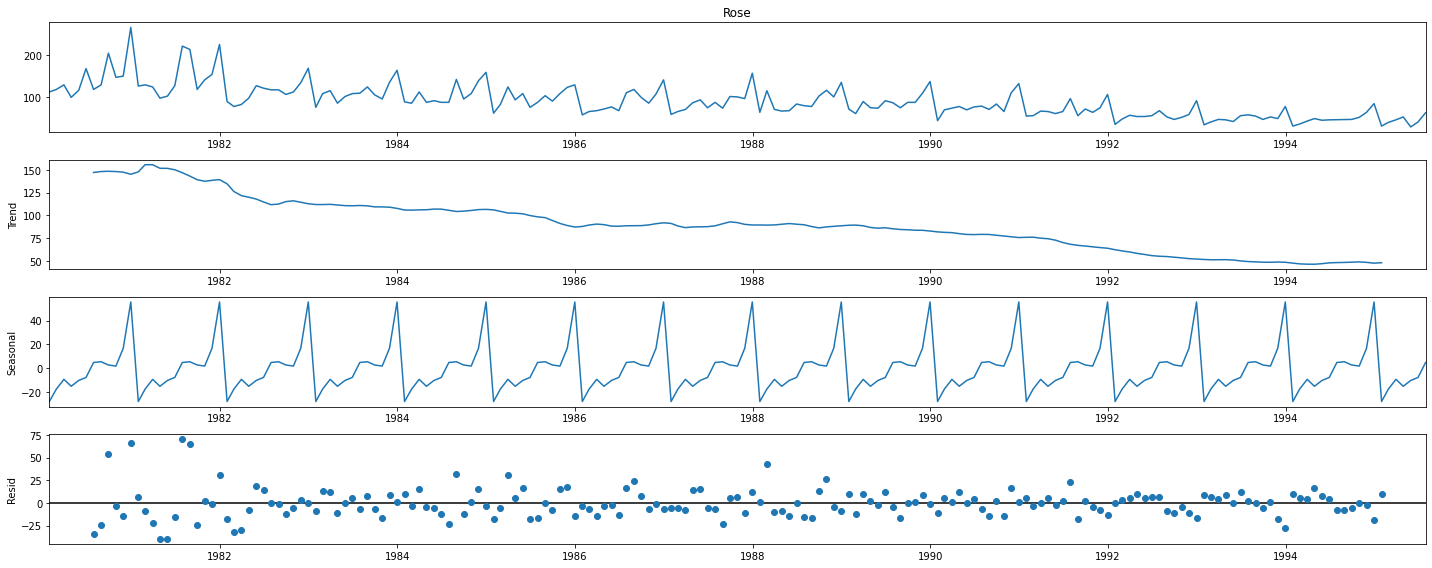

In [965]:
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [966]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-12-31    66.16

In [967]:
#Since this is an additive model:
#Observed = Trend + Seasonal + Irregular should hold true
147.083333 + 4.896908  -33.980241

118.0

In [968]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    113.103092
1980-08-31    123.500314
1980-09-30    202.225314
1980-10-31    145.128092
1980-11-30    133.153092
1980-12-31    211.286425
dtype: float64

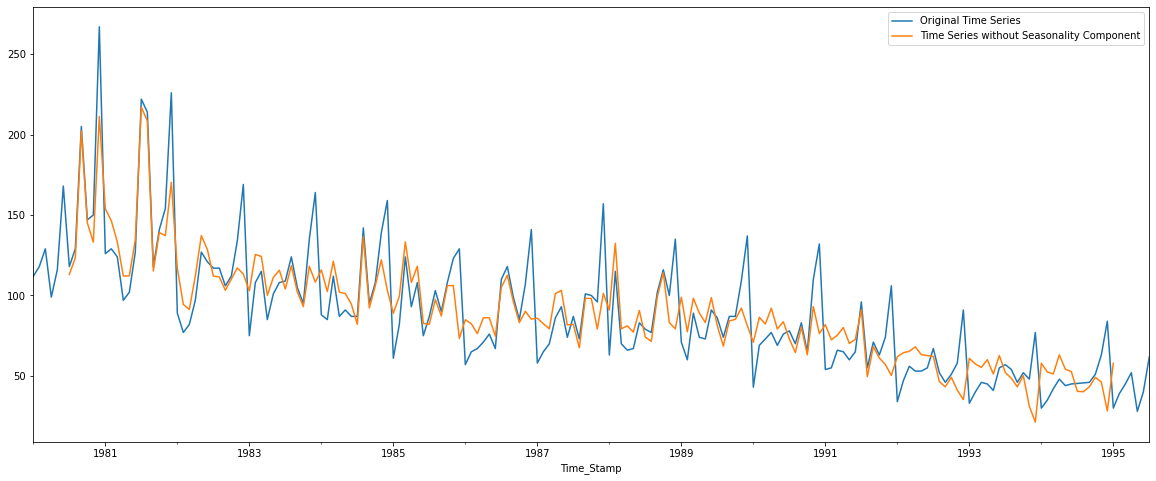

In [969]:
df.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

### Multiplicative Decomposition

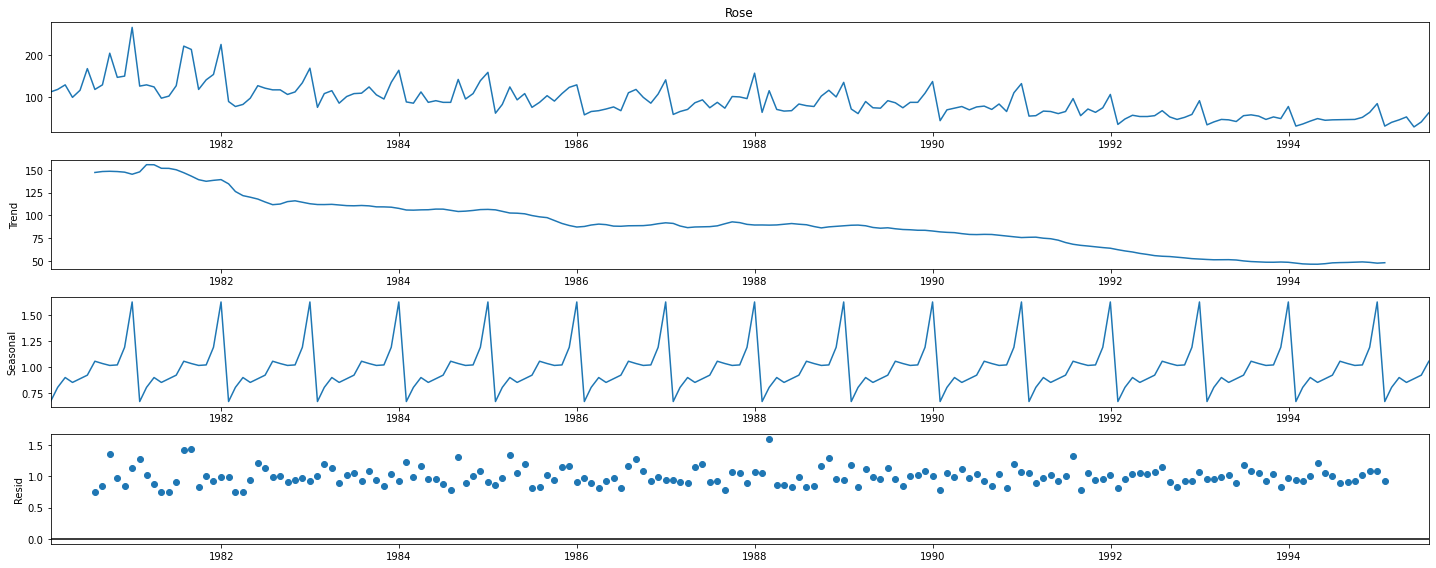

In [970]:
decomposition_m = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition_m.plot();

In [971]:
trend_m = decomposition_m.trend
seasonality_m = decomposition_m.seasonal
residual_m = decomposition_m.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908647
1980-02-29   -17.435632
1980-03-31    -9.285830
1980-04-30   -15.098330
1980-05-31   -10.196544
1980-06-30    -7.678687
1980-07-31     4.896908
1980-08-31     5.499686
1980-09-30     2.774686
1980-10-31     1.871908
1980-11-30    16.846908
1980-12-31    55.713575
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980241
1980-08-31   -24.624686
1980-09-30    53.850314
1980-10-31    -2.955241
1980-11-30   -14.263575
1980-12-31    66.16

In [972]:
deaseasonalized_ts_m = trend + residual
deaseasonalized_ts_m.head(12)

Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    113.103092
1980-08-31    123.500314
1980-09-30    202.225314
1980-10-31    145.128092
1980-11-30    133.153092
1980-12-31    211.286425
dtype: float64

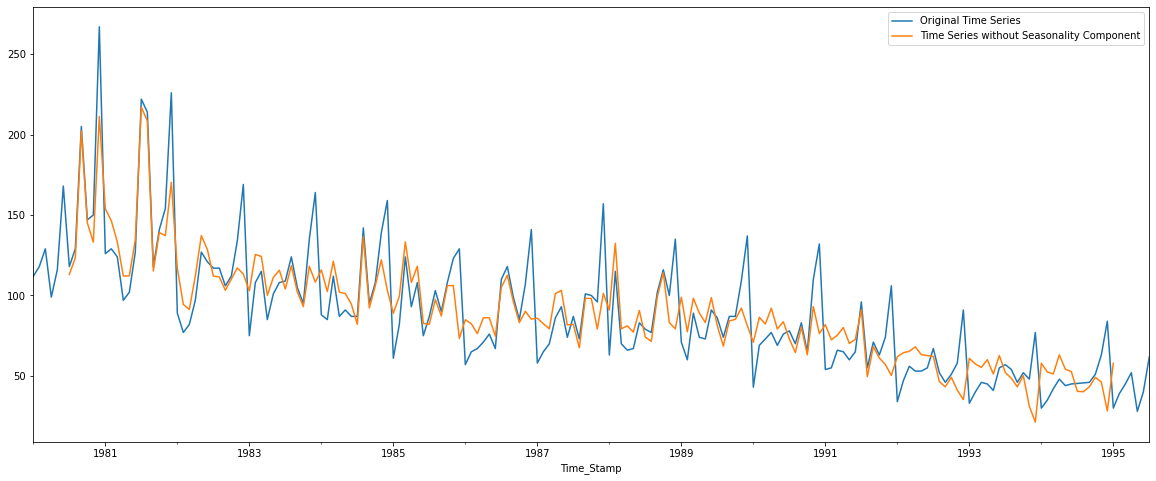

In [973]:
df.plot()
deaseasonalized_ts_m.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

### 3. Split the data into training and test. The test data should start in 1991.

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [974]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [975]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [976]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [977]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Exponential Smoothing methods
Exponential smoothing methods consist of flattening time series data. 

Exponential smoothing averages or exponentially weighted moving averages consist of forecast based on previous periods data with exponentially declining influence on the older observations.

Exponential smoothing methods consist of special case exponential moving with notation ETS (Error, Trend, Seasonality) where each can be none(N), additive (N), additive damped (Ad), Multiplicative (M) or multiplicative damped (Md).

One or more parameters control how fast the weights decay.

These parameters have values between 0 and 1.

### SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors
#### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES).
#### This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

 - Ft+1=αYt+(1−α)Ft
 
Parameter α is called the smoothing constant and its value lies between 0 and 1. Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

#### Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.
SimpleExpSmoothing class must be instantiated and passed the training data.

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. If this is omitted or set to None, the model will automatically optimize the value.

In [978]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   pylab                           import rcParams

In [979]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [980]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [981]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.09874983698117956,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38702481818487,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [982]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-31    87.104997
1991-02-28    87.104997
1991-03-31    87.104997
1991-04-30    87.104997
1991-05-31    87.104997
1991-06-30    87.104997
1991-07-31    87.104997
1991-08-31    87.104997
1991-09-30    87.104997
1991-10-31    87.104997
1991-11-30    87.104997
1991-12-31    87.104997
1992-01-31    87.104997
1992-02-29    87.104997
1992-03-31    87.104997
1992-04-30    87.104997
1992-05-31    87.104997
1992-06-30    87.104997
1992-07-31    87.104997
1992-08-31    87.104997
1992-09-30    87.104997
1992-10-31    87.104997
1992-11-30    87.104997
1992-12-31    87.104997
1993-01-31    87.104997
1993-02-28    87.104997
1993-03-31    87.104997
1993-04-30    87.104997
1993-05-31    87.104997
1993-06-30    87.104997
1993-07-31    87.104997
1993-08-31    87.104997
1993-09-30    87.104997
1993-10-31    87.104997
1993-11-30    87.104997
1993-12-31    87.104997
1994-01-31    87.104997
1994-02-28    87.104997
1994-03-31    87.104997
1994-04-30    87.104997
1994-05-31    87.104997
1994-06-30    87

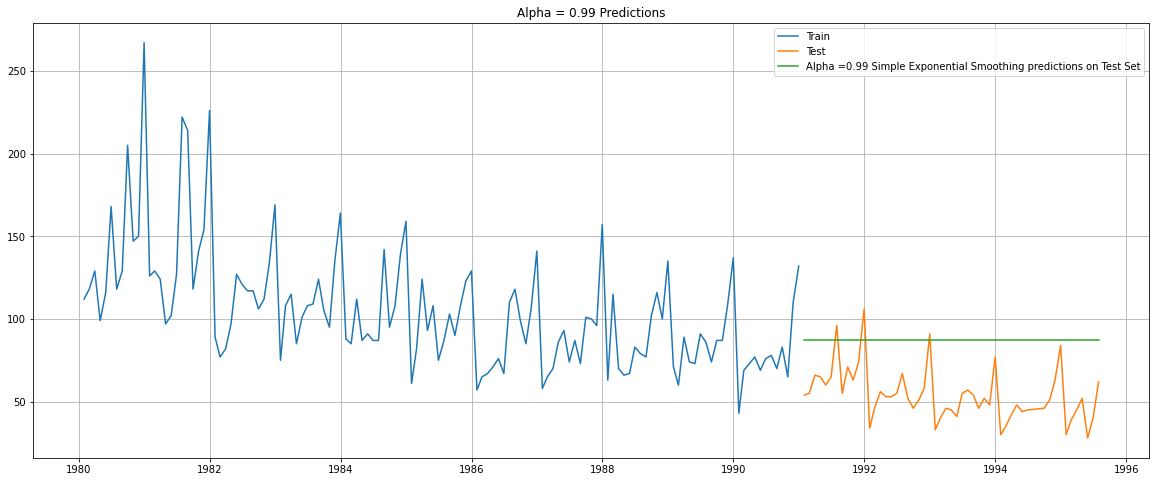

In [983]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [984]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [985]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 36.79624054770398
SES RMSE (calculated using statsmodels): 36.796240547703974


In [986]:
resultsDf_temp_A = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf_temp_A

,Test RMSE
"Alpha=0.99,SES",36.796241


### Holt - ETS(A, A, N) - Holt's linear method with additive errors
### Double Exponential Smoothing
- One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.

- This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.

- Applicable when data has Trend but no seasonality.

- Two separate components are considered: Level and Trend.

- Level is the local mean.

- One smoothing parameter α corresponds to the level series

- A second smoothing parameter β corresponds to the trend series.

#### Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.

- Intercept or Level equation, Lt is given by: Lt=αYt+(1−α)Ft
- Trend equation is given by Tt=β(Lt−Lt−1)+(1−β)Tt−1

Here, α and β are the smoothing constants for level and trend, respectively,

0 <α < 1 and 0 < β < 1.

The forecast at time t + 1 is given by

- Ft+1=Lt+Tt
- Ft+n=Lt+nTt

In [987]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 1.6610391146660035e-10, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81553690867275, 'initial_trend': -0.4943781897068274, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [988]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31    72.063238
1991-02-28    71.568859
1991-03-31    71.074481
1991-04-30    70.580103
1991-05-31    70.085725
1991-06-30    69.591347
1991-07-31    69.096969
1991-08-31    68.602590
1991-09-30    68.108212
1991-10-31    67.613834
1991-11-30    67.119456
1991-12-31    66.625078
1992-01-31    66.130699
1992-02-29    65.636321
1992-03-31    65.141943
1992-04-30    64.647565
1992-05-31    64.153187
1992-06-30    63.658808
1992-07-31    63.164430
1992-08-31    62.670052
1992-09-30    62.175674
1992-10-31    61.681296
1992-11-30    61.186918
1992-12-31    60.692539
1993-01-31    60.198161
1993-02-28    59.703783
1993-03-31    59.209405
1993-04-30    58.715027
1993-05-31    58.220648
1993-06-30    57.726270
1993-07-31    57.231892
1993-08-31    56.737514
1993-09-30    56.243136
1993-10-31    55.748757
1993-11-30    55.254379
1993-12-31    54.760001
1994-01-31    54.265623
1994-02-28    53.771245
1994-03-31    53.276866
1994-04-30    52.782488
1994-05-31    52.288110
1994-06-30    51

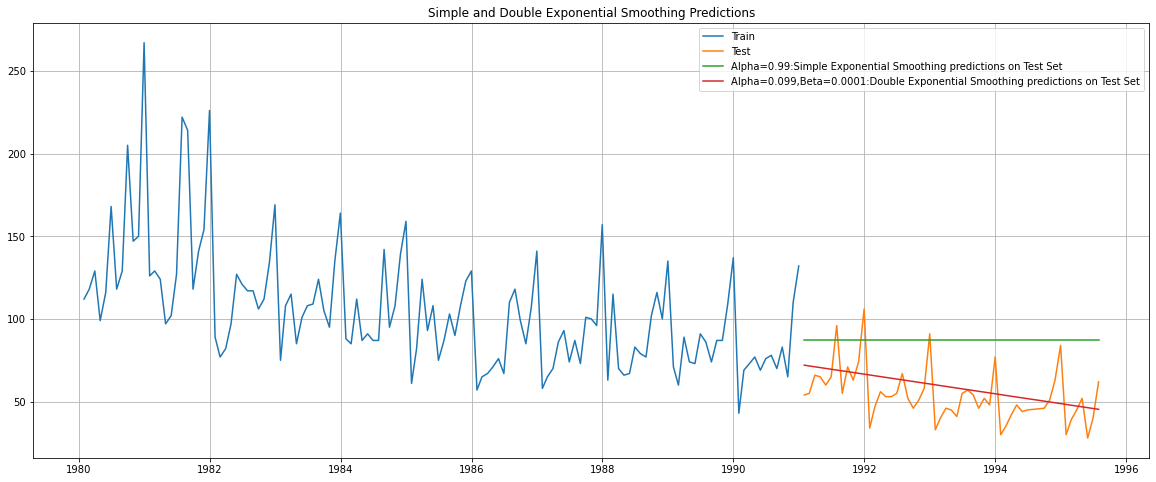

In [989]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

We see that the double exponential smoothing is leveling down the trend component along with the level component as well.

In [990]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 15.268943764436564


In [991]:
resultsDf_temp_B = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp_B])
resultsDf

,RMSE,MAPE,Test RMSE
"ARIMA(2,1,1)",36.833530,63.920000,NaN
"SARIMA(1, 1, 0)(1,0,2)12",64.096436,112.380000,NaN
"ARIMA(3,1,3)",36.701328,75.542195,NaN
"SARIMA(3,1,3)(0,0,3,6)",29.719948,60.374072,NaN
RegressionOnTime,NaN,NaN,57.790054
NaiveModel,NaN,NaN,79.718773
SimpleAverageModel,NaN,NaN,53.460570
"Alpha=0.99,SES",NaN,NaN,36.796241
"Alpha=1,Beta=0.0189:DES",NaN,NaN,15.268944
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",NaN,NaN,14.249661


### Inference
Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. You can try these out later to check whether you get a better forecast.

### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [992]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08954054664605082, 'smoothing_trend': 0.0002400108693915795, 'smoothing_seasonal': 0.003466872515750747, 'damping_trend': nan, 'initial_level': 146.5570157826235, 'initial_trend': -0.547196983509005, 'initial_seasons': array([-31.17478463, -18.74839869, -10.76961776, -21.36741017,
       -12.63775539,  -7.27430333,   2.61279801,   8.69603625,
         4.79381122,   2.96110122,  21.05738849,  63.18279918]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [993]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-31     42.684928
1991-02-28     54.564005
1991-03-31     61.995209
1991-04-30     50.852018
1991-05-31     59.034271
1991-06-30     63.850901
1991-07-31     73.190805
1991-08-31     78.724624
1991-09-30     74.276280
1991-10-31     71.895000
1991-11-30     89.444365
1991-12-31    131.042724
1992-01-31     36.119272
1992-02-29     47.998349
1992-03-31     55.429553
1992-04-30     44.286362
1992-05-31     52.468615
1992-06-30     57.285245
1992-07-31     66.625149
1992-08-31     72.158968
1992-09-30     67.710624
1992-10-31     65.329344
1992-11-30     82.878709
1992-12-31    124.477068
1993-01-31     29.553616
1993-02-28     41.432693
1993-03-31     48.863898
1993-04-30     37.720706
1993-05-31     45.902959
1993-06-30     50.719589
1993-07-31     60.059493
1993-08-31     65.593312
1993-09-30     61.144968
1993-10-31     58.763688
1993-11-30     76.313053
1993-12-31    117.911412
1994-01-31     22.987961
1994-02-28     34.867037
1994-03-31     42.298242
1994-04-30     31.155050


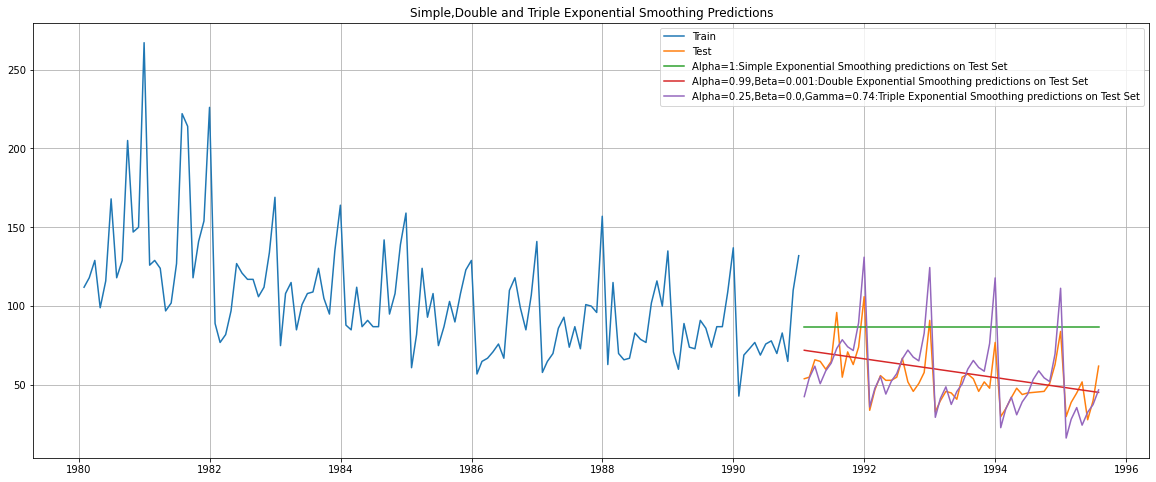

In [994]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is leveling down the seasonal component as well.

In [995]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 14.249660750768982


In [996]:
resultsDf_temp_D = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp_D])
resultsDf

,RMSE,MAPE,Test RMSE
"ARIMA(2,1,1)",36.833530,63.920000,NaN
"SARIMA(1, 1, 0)(1,0,2)12",64.096436,112.380000,NaN
"ARIMA(3,1,3)",36.701328,75.542195,NaN
"SARIMA(3,1,3)(0,0,3,6)",29.719948,60.374072,NaN
RegressionOnTime,NaN,NaN,57.790054
NaiveModel,NaN,NaN,79.718773
SimpleAverageModel,NaN,NaN,53.460570
"Alpha=0.99,SES",NaN,NaN,36.796241
"Alpha=1,Beta=0.0189:DES",NaN,NaN,15.268944
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",NaN,NaN,14.249661


### Inference
Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality.

But we see that our triple exponential smoothing is under forecasting. Let us try to tweak some of the parameters in order to get a better forecast on the test set.

### Holt-Winters - ETS(A, A, M) - Holt Winter's linear method
ETS(A, A, M) model

In [997]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.0715106306609405, 'smoothing_trend': 0.04529179757535142, 'smoothing_seasonal': 7.244325029450242e-05, 'damping_trend': nan, 'initial_level': 130.40839142502193, 'initial_trend': -0.77985743179386, 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
       1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
       1.44724625, 1.99553681]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [998]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-31     56.321655
1991-02-28     63.664690
1991-03-31     69.374024
1991-04-30     60.435528
1991-05-31     67.758341
1991-06-30     73.546478
1991-07-31     80.630117
1991-08-31     85.541323
1991-09-30     80.707713
1991-10-31     78.764555
1991-11-30     91.531230
1991-12-31    125.788433
1992-01-31     54.168902
1992-02-29     61.223492
1992-03-31     66.705377
1992-04-30     58.103246
1992-05-31     65.135026
1992-06-30     70.689855
1992-07-31     77.488188
1992-08-31     82.197159
1992-09-30     77.542202
1992-10-31     75.665128
1992-11-30     87.917577
1992-12-31    120.805914
1993-01-31     52.016149
1993-02-28     58.782294
1993-03-31     64.036730
1993-04-30     55.770964
1993-05-31     62.511711
1993-06-30     67.833232
1993-07-31     74.346259
1993-08-31     78.852995
1993-09-30     74.376691
1993-10-31     72.565700
1993-11-30     84.303925
1993-12-31    115.823395
1994-01-31     49.863396
1994-02-28     56.341097
1994-03-31     61.368082
1994-04-30     53.438682


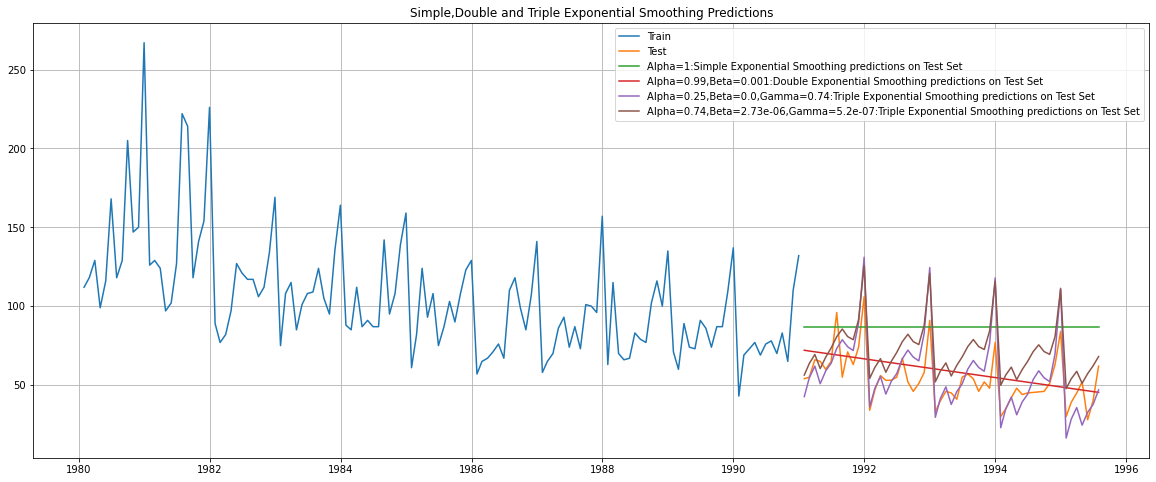

In [999]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

### Report model accuracy

In [1000]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 20.156762582665337


In [1001]:
resultsDf_temp_E = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp_E])
resultsDf

,RMSE,MAPE,Test RMSE
"ARIMA(2,1,1)",36.833530,63.920000,NaN
"SARIMA(1, 1, 0)(1,0,2)12",64.096436,112.380000,NaN
"ARIMA(3,1,3)",36.701328,75.542195,NaN
"SARIMA(3,1,3)(0,0,3,6)",29.719948,60.374072,NaN
RegressionOnTime,NaN,NaN,57.790054
NaiveModel,NaN,NaN,79.718773
SimpleAverageModel,NaN,NaN,53.460570
"Alpha=0.99,SES",NaN,NaN,36.796241
"Alpha=1,Beta=0.0189:DES",NaN,NaN,15.268944
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",NaN,NaN,14.249661


We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

There are various other parameters in the models. Please do feel free to play around with those in the hope of getting a better forecast on the test set.

### Building different models and comparing the accuracy metrics.
### Model 1: Linear Regression
For this particular linear regression, we are going to regress the 'Births' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [1002]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [1003]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [1004]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Rose,time
Time_Stamp,,
1980-01-31,112.0,1
1980-02-29,118.0,2
1980-03-31,129.0,3
1980-04-30,99.0,4
1980-05-31,116.0,5


Last few rows of Training Data


,Rose,time
Time_Stamp,,
1990-08-31,70.0,128
1990-09-30,83.0,129
1990-10-31,65.0,130
1990-11-30,110.0,131
1990-12-31,132.0,132


First few rows of Test Data


,Rose,time
Time_Stamp,,
1991-01-31,54.0,256
1991-02-28,55.0,257
1991-03-31,66.0,258
1991-04-30,65.0,259
1991-05-31,60.0,260


Last few rows of Test Data


,Rose,time
Time_Stamp,,
1995-03-31,45.0,306
1995-04-30,52.0,307
1995-05-31,28.0,308
1995-06-30,40.0,309
1995-07-31,62.0,310


Now that our training and test data has been modified, let us go ahead use LinearRegression to build the model on the training data and test the model on the test data.



In [1005]:
from sklearn.linear_model import LinearRegression

In [1006]:
lr = LinearRegression()

In [1007]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

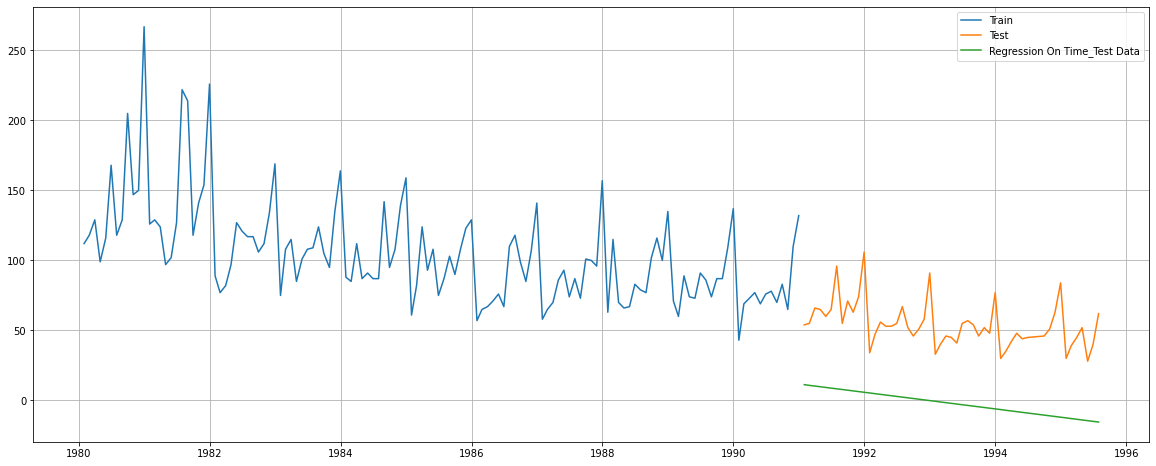

In [1008]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

### Defining the functions for calculating the accuracy metrics.

In [1009]:
from sklearn import metrics

### Model Evaluation

In [1010]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 57.790 


In [1011]:
resultsDf_1 = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf_1

,Test RMSE
RegressionOnTime,57.790054


### Model 2: Naive Approach: y^t+1=yt
For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [1012]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [1013]:
train.tail()

,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


In [1014]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

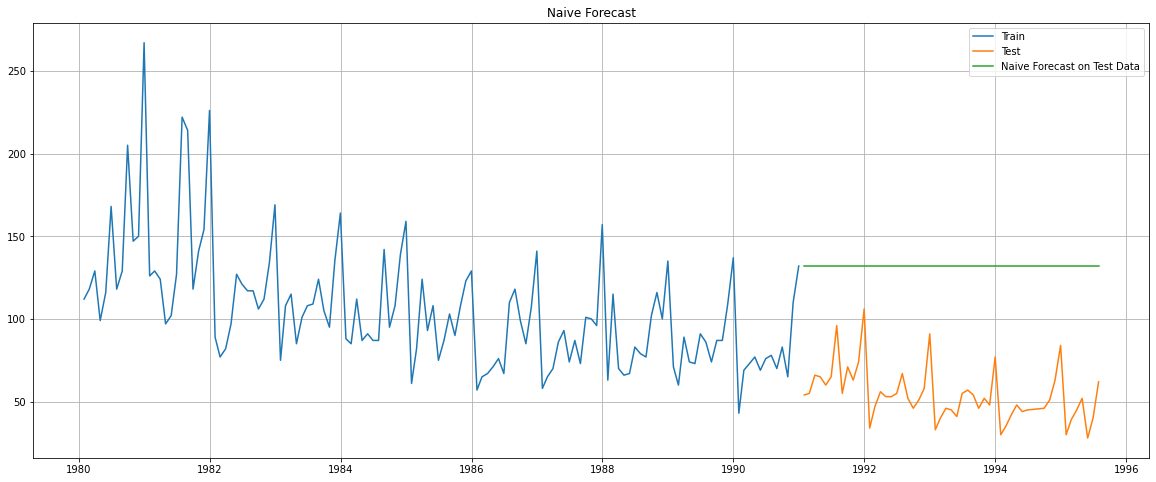

In [1015]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [1016]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 79.719


In [1083]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf_3 = pd.concat([resultsDf_1, resultsDf_2])
resultsDf_3

,Test RMSE
RegressionOnTime,57.790054
NaiveModel,79.718773


### Method 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [1018]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [1019]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


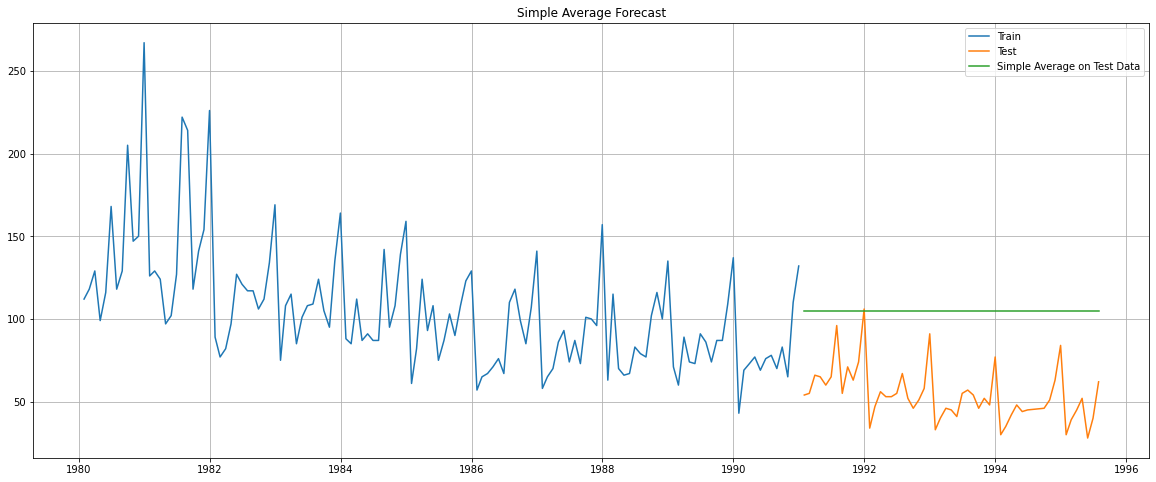

In [1020]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [1021]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.461


In [1022]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf_5 = pd.concat([resultsDf_1, resultsDf_2,resultsDf_4])
resultsDf_5

,Test RMSE
RegressionOnTime,57.790054
NaiveModel,79.718773
SimpleAverageModel,53.460570


We can see that the Simple Average model performs well compared to other models as the RMSE is less compared to others.


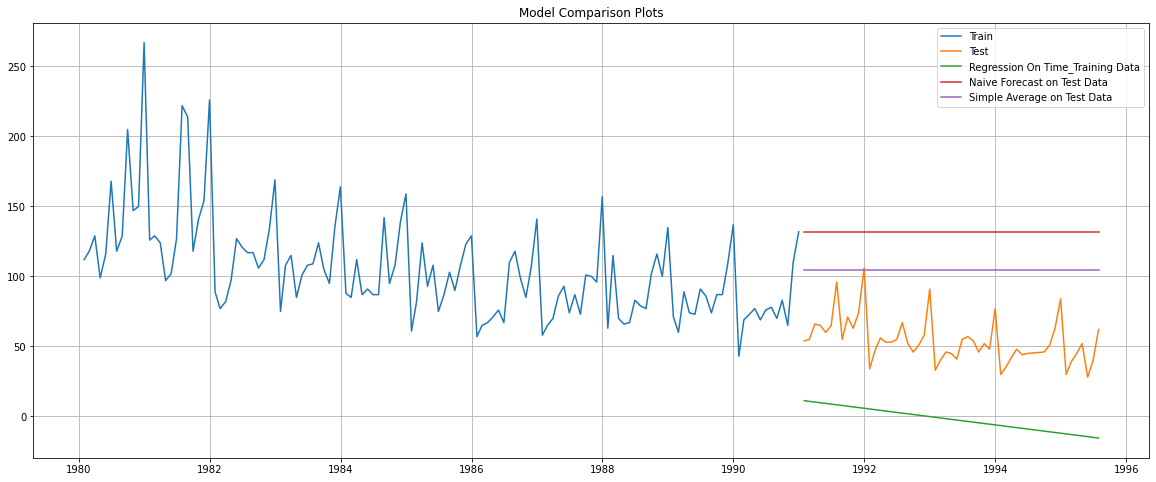

In [1023]:
## Plotting on both Training and Test data

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

### Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

- 𝐻0  : The Time Series has a unit root and is thus non-stationary.
- 𝐻1  : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the  𝛼  value.

In [1024]:
# Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

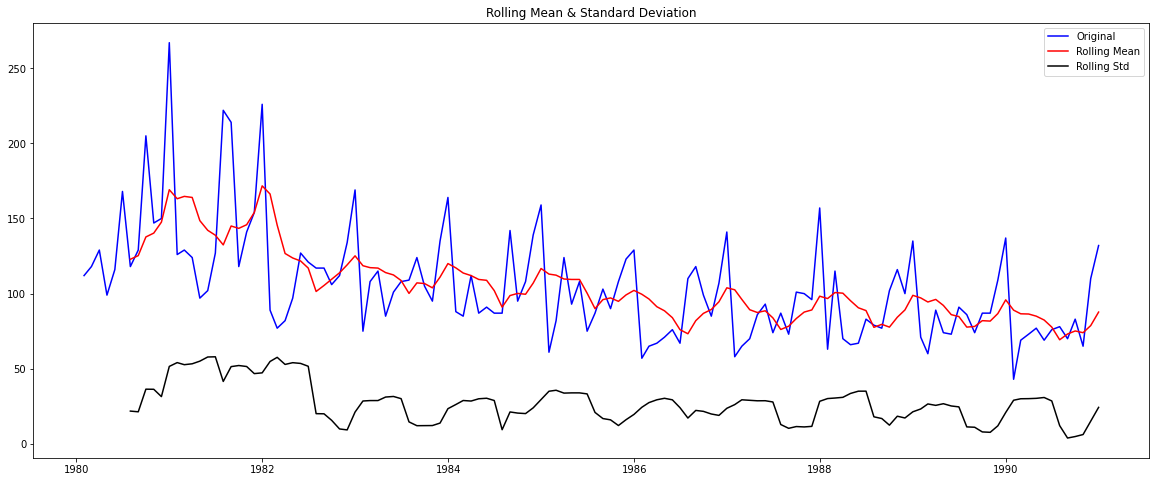

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [1025]:
test_stationarity(train['Rose'])

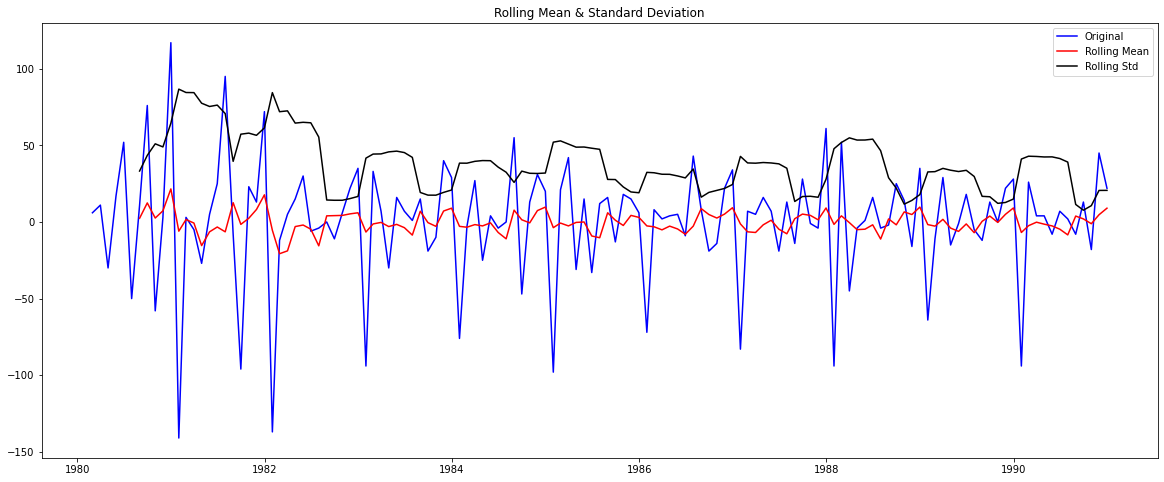

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [1026]:
test_stationarity(train.diff().dropna())

Going forward, for all the questions 'training data' means the data on which the model will be built and which is stationary in nature.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [1027]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [1028]:
train_diff = train.diff(periods=1).dropna()
train_diff

,Rose
Time_Stamp,
1980-02-29,6.0
1980-03-31,11.0
1980-04-30,-30.0
1980-05-31,17.0
1980-06-30,52.0
...,...
1990-08-31,-8.0
1990-09-30,13.0
1990-10-31,-18.0


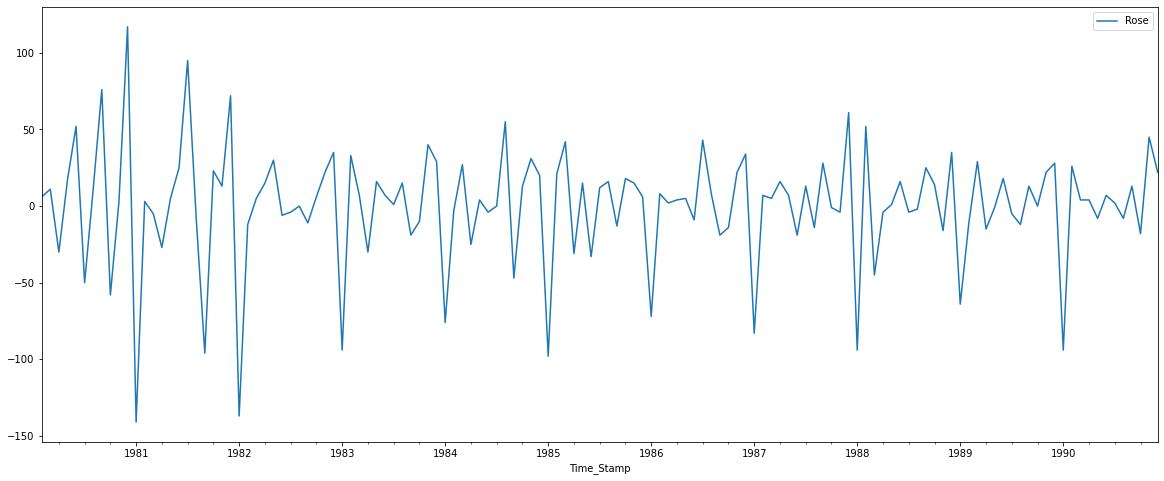

In [1029]:
train_diff.plot();

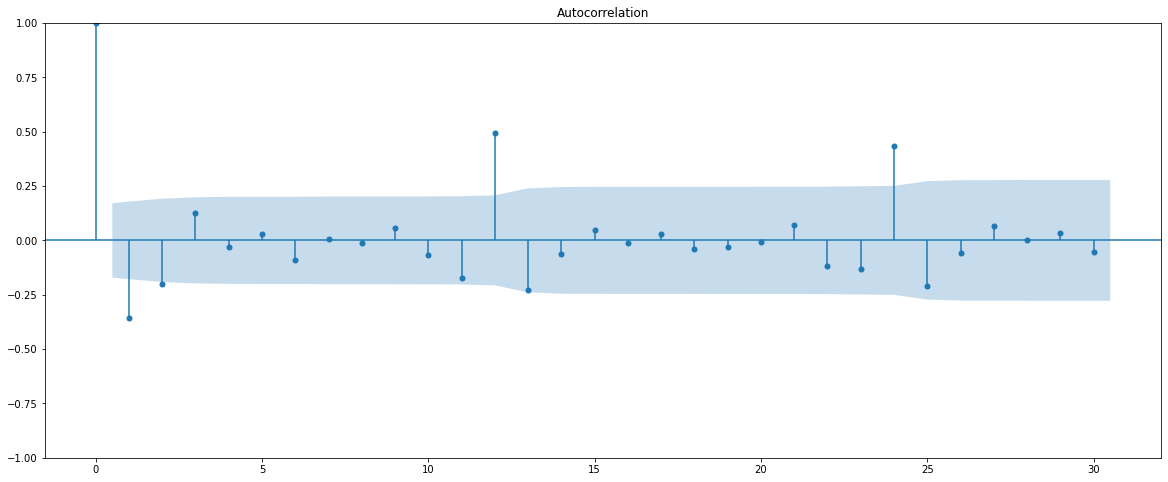

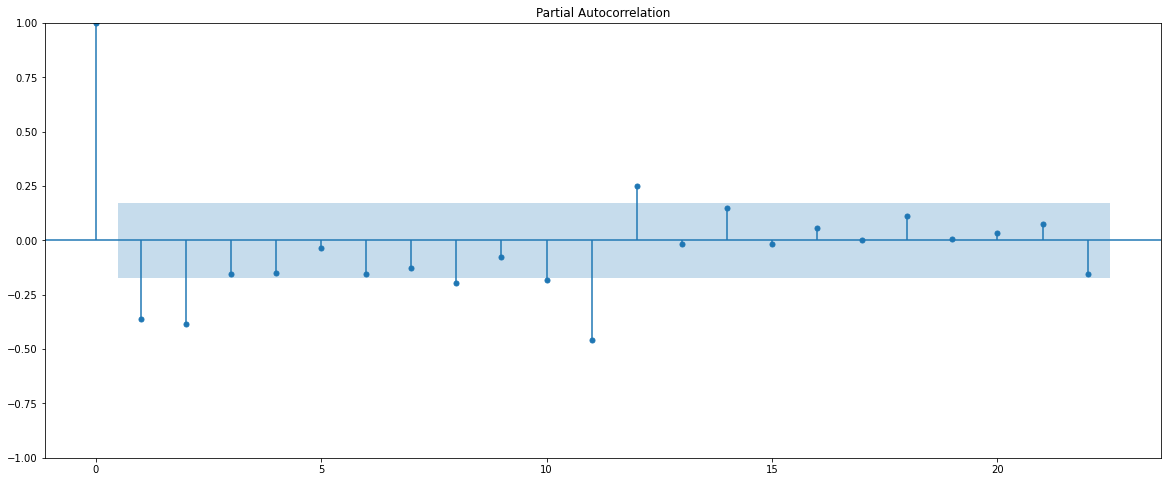

In [1030]:
plot_acf(train_diff,lags=30)
plot_pacf(train_diff);

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### ARIMA

In [1031]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 0 as we have already taken a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [1032]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [1033]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535806
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380064
ARIMA(1, 1, 2) - AIC:1279.8707234231922
ARIMA(2, 1, 0) - AIC:1298.6110341605004
ARIMA(2, 1, 1) - AIC:1281.5078621868543
ARIMA(2, 1, 2) - AIC:1281.8707222264356


In [1034]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1279.671529
5,"(1, 1, 2)",1279.870723
4,"(1, 1, 1)",1280.574230
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722
1,"(0, 1, 1)",1282.309832
6,"(2, 1, 0)",1298.611034
3,"(1, 1, 0)",1317.350311
0,"(0, 1, 0)",1333.154673


In [1035]:
mod = ARIMA(train['Rose'], order=(2,1,1))

results_Arima = mod.fit()

print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -636.754
Date:                Mon, 21 Mar 2022   AIC                           1281.508
Time:                        00:14:14   BIC                           1293.009
Sample:                    01-31-1980   HQIC                          1286.181
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1834      0.078      2.353      0.019       0.031       0.336
ar.L2         -0.0959      0.106     -0.907      0.364      -0.303       0.111
ma.L1         -0.9075      0.058    -15.663      0.0

The above model is an AutoRegressive Integrated Moving Average model of order (2,1,1) i.e. the Time Series being regressed upon itself at a lag of 2, the errors from a lag of 1 and a lag and a degree or order differencing of 1 to make it stationary.

### Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [1036]:
## Mean Absolute Percentage - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [1037]:
from sklearn.metrics import mean_squared_error

In [1038]:
predicted_autoARIMA = results_Arima.forecast(steps=len(test))
predicted_autoARIMA

1991-01-31    93.130414
1991-02-28    83.892788
1991-03-31    85.924750
1991-04-30    87.182952
1991-05-31    87.218916
1991-06-30    87.104897
1991-07-31    87.080539
1991-08-31    87.087002
1991-09-30    87.090522
1991-10-31    87.090548
1991-11-30    87.090215
1991-12-31    87.090152
1992-01-31    87.090172
1992-02-29    87.090182
1992-03-31    87.090182
1992-04-30    87.090181
1992-05-31    87.090181
1992-06-30    87.090181
1992-07-31    87.090181
1992-08-31    87.090181
1992-09-30    87.090181
1992-10-31    87.090181
1992-11-30    87.090181
1992-12-31    87.090181
1993-01-31    87.090181
1993-02-28    87.090181
1993-03-31    87.090181
1993-04-30    87.090181
1993-05-31    87.090181
1993-06-30    87.090181
1993-07-31    87.090181
1993-08-31    87.090181
1993-09-30    87.090181
1993-10-31    87.090181
1993-11-30    87.090181
1993-12-31    87.090181
1994-01-31    87.090181
1994-02-28    87.090181
1994-03-31    87.090181
1994-04-30    87.090181
1994-05-31    87.090181
1994-06-30    87

In [1039]:
results_Arima.predict(start=pd.to_datetime('1991-01-31'),end=pd.to_datetime('1995-07-31 '),typ = 'level',dynamic=True,full_results=True)

1991-01-31    93.130414
1991-02-28    83.892788
1991-03-31    85.924750
1991-04-30    87.182952
1991-05-31    87.218916
1991-06-30    87.104897
1991-07-31    87.080539
1991-08-31    87.087002
1991-09-30    87.090522
1991-10-31    87.090548
1991-11-30    87.090215
1991-12-31    87.090152
1992-01-31    87.090172
1992-02-29    87.090182
1992-03-31    87.090182
1992-04-30    87.090181
1992-05-31    87.090181
1992-06-30    87.090181
1992-07-31    87.090181
1992-08-31    87.090181
1992-09-30    87.090181
1992-10-31    87.090181
1992-11-30    87.090181
1992-12-31    87.090181
1993-01-31    87.090181
1993-02-28    87.090181
1993-03-31    87.090181
1993-04-30    87.090181
1993-05-31    87.090181
1993-06-30    87.090181
1993-07-31    87.090181
1993-08-31    87.090181
1993-09-30    87.090181
1993-10-31    87.090181
1993-11-30    87.090181
1993-12-31    87.090181
1994-01-31    87.090181
1994-02-28    87.090181
1994-03-31    87.090181
1994-04-30    87.090181
1994-05-31    87.090181
1994-06-30    87

In [1040]:
RMSE_autoARIMA = mean_squared_error(test['Rose'],predicted_autoARIMA,squared=False)
MAPE_autoARIMA = MAPE(test['Rose'],predicted_autoARIMA)

print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA,'\nMAPE for the autofit ARIMA model:',MAPE_autoARIMA)

RMSE for the autofit ARIMA model: 36.83353005326254 
MAPE for the autofit ARIMA model: 63.92


In [1041]:
resultsDf = pd.DataFrame({'RMSE': [RMSE_autoARIMA],'MAPE':[MAPE_autoARIMA]}
                           ,index=['ARIMA(2,1,1)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,1)",36.83353,63.92


### Forecast the values for the next 24 months using the ARIMA model just built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.

In [1042]:
pred_dynamic = results_Arima.get_prediction(start=pd.to_datetime('1996-01-01'), dynamic=True, full_results=True)

In [1043]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [1044]:
pred95 = results_Arima.get_forecast(steps=24, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [1045]:
forecast_fullmodel_autoarima = pred95.predicted_mean

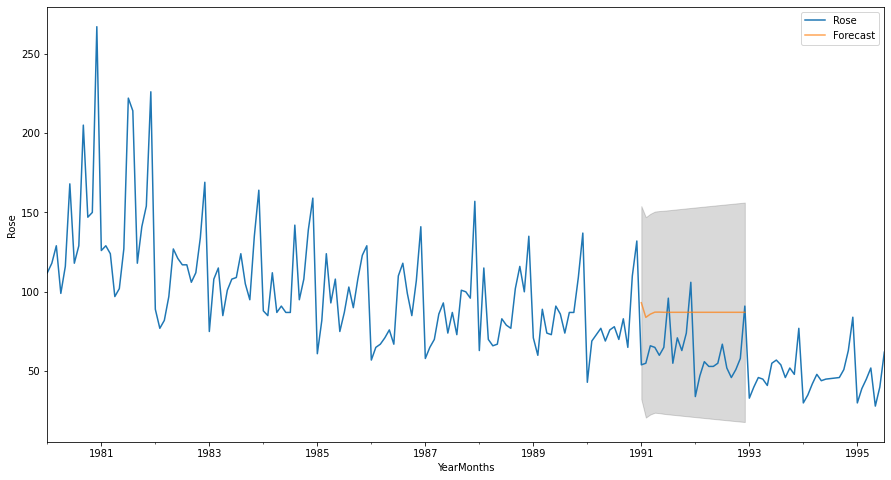

In [1046]:
# plot the forecast along with the confidence band

axis = df.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autoarima.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_autoarima.index, pred_ci_95['lower Rose'], pred_ci_95['upper Rose'], color='k', alpha=.15)
axis.set_xlabel('YearMonths')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

For a ARIMA model, we can see the predictions with 95% confidence interval bands. The seasonality was unable to be captured. Let us try out a SARIMA model.

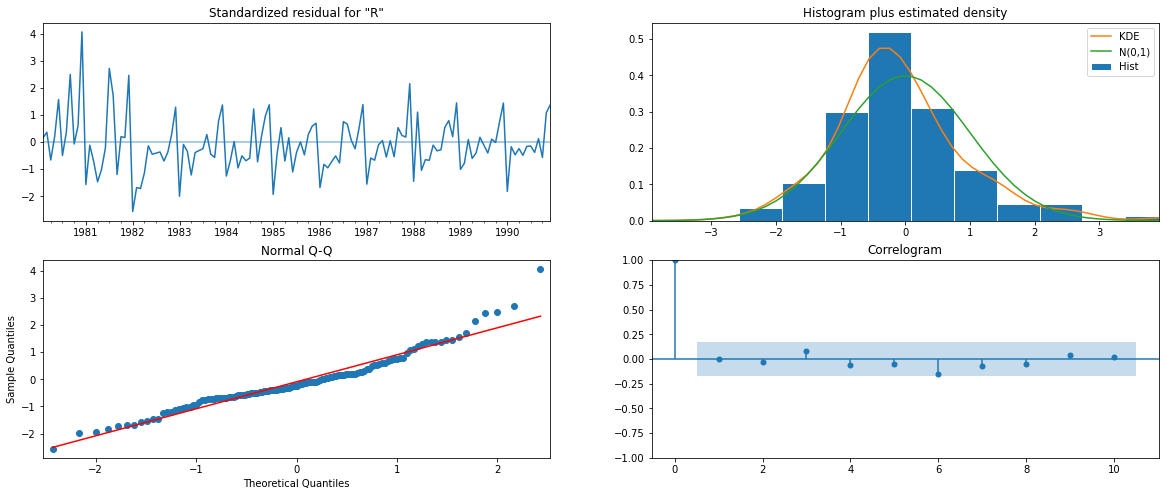

In [1047]:
results_Arima.plot_diagnostics();

### SARIMA

In [1048]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [1049]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [1050]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1145.4230827207175
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:976.4375296380895
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1116.0207869386002
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:969.6913635750373
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:955.5735408945867
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:923.6314049383807
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1095.793632491795
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1054.743433094548
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:918.8573483311407
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:914.5982866536075
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:915.3332430461666
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:901.1988257864924
SARIM

In [1051]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
53,"(1, 1, 2)","(2, 0, 2, 12)",889.902650
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [1052]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(1,1,0),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  132
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood                -474.250
Date:                                 Mon, 21 Mar 2022   AIC                            958.500
Time:                                         00:15:20   BIC                            971.817
Sample:                                     01-31-1980   HQIC                           963.898
                                          - 12-31-1990                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3485      0.098     -3.550      0.000      -0.541      -0

### Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [1053]:
predicted_autoSARIMA = results_SARIMA.forecast(steps=len(test))
predicted_autoSARIMA

1991-01-31     81.001879
1991-02-28     84.143194
1991-03-31    100.675560
1991-04-30     98.362576
1991-05-31     93.941522
1991-06-30    100.132738
1991-07-31    101.648905
1991-08-31     95.587946
1991-09-30     99.253310
1991-10-31     87.796874
1991-11-30    119.572874
1991-12-31    129.606804
1992-01-31     91.752247
1992-02-29     98.563438
1992-03-31    106.182424
1992-04-30    110.075447
1992-05-31    106.094840
1992-06-30    106.520822
1992-07-31    110.082119
1992-08-31    105.962304
1992-09-30    108.854085
1992-10-31     96.580749
1992-11-30    122.304053
1992-12-31    129.857549
1993-01-31    111.635239
1993-02-28    115.090290
1993-03-31    118.420392
1993-04-30    120.231126
1993-05-31    118.409492
1993-06-30    118.608159
1993-07-31    120.222228
1993-08-31    118.353510
1993-09-30    119.665431
1993-10-31    114.096468
1993-11-30    125.768423
1993-12-31    129.195842
1994-01-31    120.927441
1994-02-28    122.495176
1994-03-31    124.006214
1994-04-30    124.827837


In [1054]:
RMSE_autoSARIMA = mean_squared_error(test['Rose'],predicted_autoSARIMA,squared=False)
MAPE_autoSARIMA = MAPE(test['Rose'],predicted_autoSARIMA)

print('RMSE for the autofit SARIMA model:',RMSE_autoSARIMA,'\nMAPE for the autofit SARIMA model:',MAPE_autoSARIMA)

RMSE for the autofit SARIMA model: 64.09643617344398 
MAPE for the autofit SARIMA model: 112.38


In [1055]:
temp_resultsDf = pd.DataFrame({'RMSE': [RMSE_autoSARIMA],'MAPE':[MAPE_autoSARIMA]}
                           ,index=['SARIMA(1, 1, 0)(1,0,2)12'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,RMSE,MAPE
"ARIMA(2,1,1)",36.833530,63.92
"SARIMA(1, 1, 0)(1,0,2)12",64.096436,112.38


### Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) SARIMA model.

In [1056]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(1,1,0),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_fullmodel = mod.fit()
print(results_SARIMA_fullmodel.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  187
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood                -696.155
Date:                                 Mon, 21 Mar 2022   AIC                           1402.310
Time:                                         00:15:22   BIC                           1417.717
Sample:                                     01-31-1980   HQIC                          1408.566
                                          - 07-31-1995                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3284      0.074     -4.460      0.000      -0.473      -0

### Forecast the values for the next 24 months using the SARIMA model built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.

In [1057]:
pred_dynamic = results_SARIMA_fullmodel.get_prediction(start=pd.to_datetime('1996-01-01'), dynamic=True, full_results=True)

In [1058]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [1059]:
pred95 = results_SARIMA_fullmodel.get_forecast(steps=24, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [1060]:
forecast_fullmodel_autosarima = pred95.predicted_mean

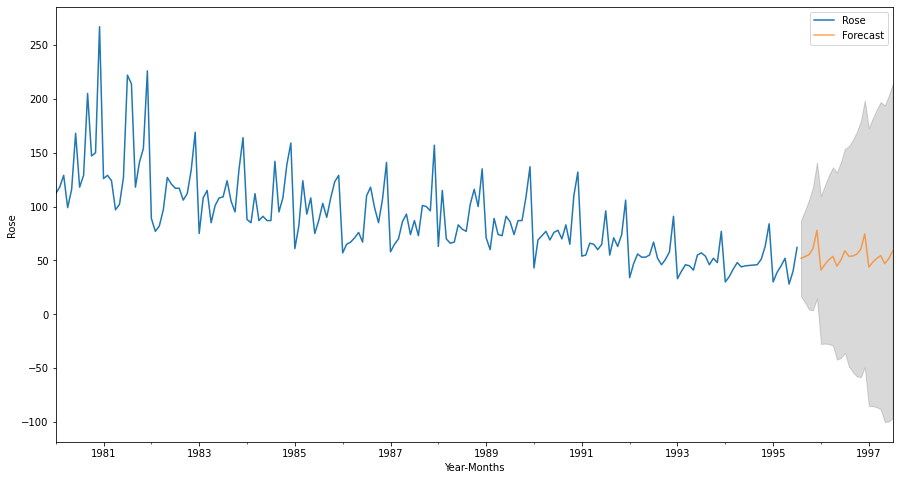

In [1061]:
# plot the forecast along with the confidence band

axis = df.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autosarima.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_autosarima.index, pred_ci_95['lower Rose'], pred_ci_95['upper Rose'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

We see that we have certainly been able to take advantage of seasonality to get a better prediction with thinner confidence intervals

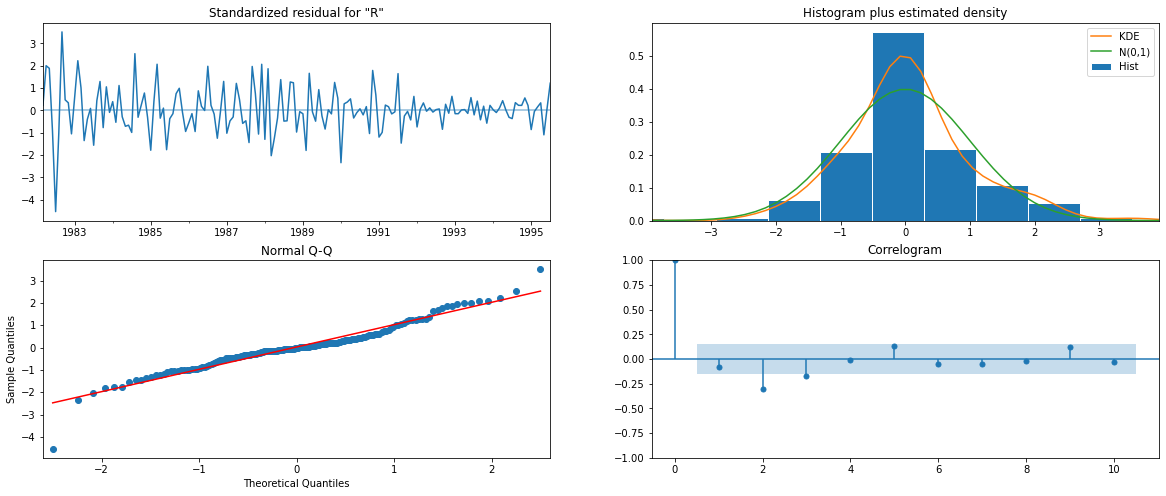

In [1062]:
results_SARIMA_fullmodel.plot_diagnostics();

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Let us look at the ACF and the PACF plots once more.

### ARIMA

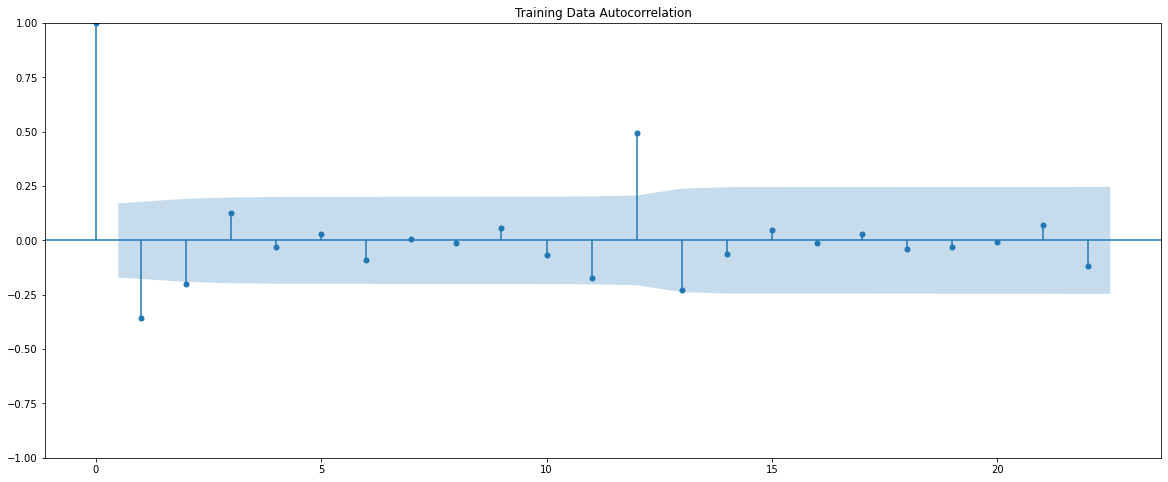

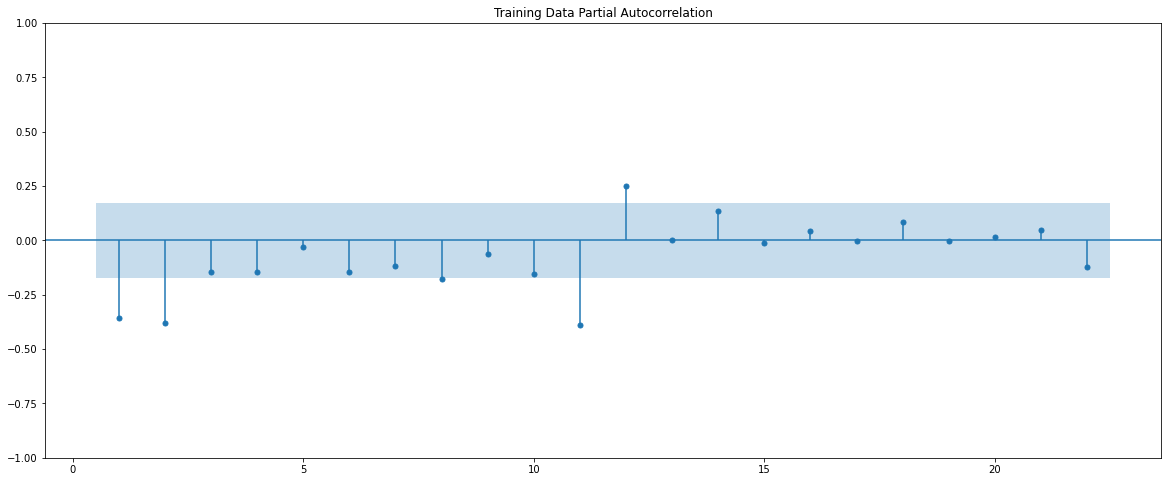

In [1063]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

- The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
- The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 3.

By looking at the above plots, we will take the value of p and q to be 3 and 1 respectively.

In [1064]:
manual_ARIMA = ARIMA(train['Rose'], order=(3,1,3),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -632.334
Date:                Mon, 21 Mar 2022   AIC                           1278.668
Time:                        00:15:26   BIC                           1298.794
Sample:                    01-31-1980   HQIC                          1286.846
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5851      0.089    -17.908      0.000      -1.759      -1.412
ar.L2         -0.6412      0.142     -4.510      0.000      -0.920      -0.363
ar.L3          0.1329      0.090      1.484      0.1

Let us analyse the residuals from the various diagnostics plot.

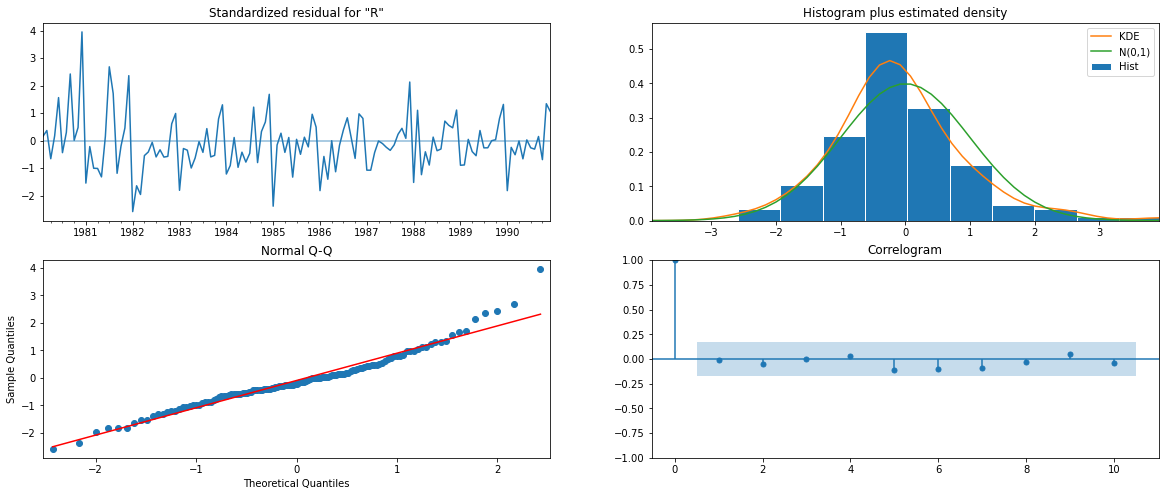

In [1065]:
results_manual_ARIMA.plot_diagnostics();

### Predict on the Test Set using this model and evaluate the model.

In [1066]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [1067]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [1068]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 36.70132818681845 
MAPE: 75.5421950978732


In [1069]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(3,1,3)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,1)",36.833530,63.920000
"SARIMA(1, 1, 0)(1,0,2)12",64.096436,112.380000
"ARIMA(3,1,3)",36.701328,75.542195


### SARIMA

Let us look at the ACF and the PACF plots once more.

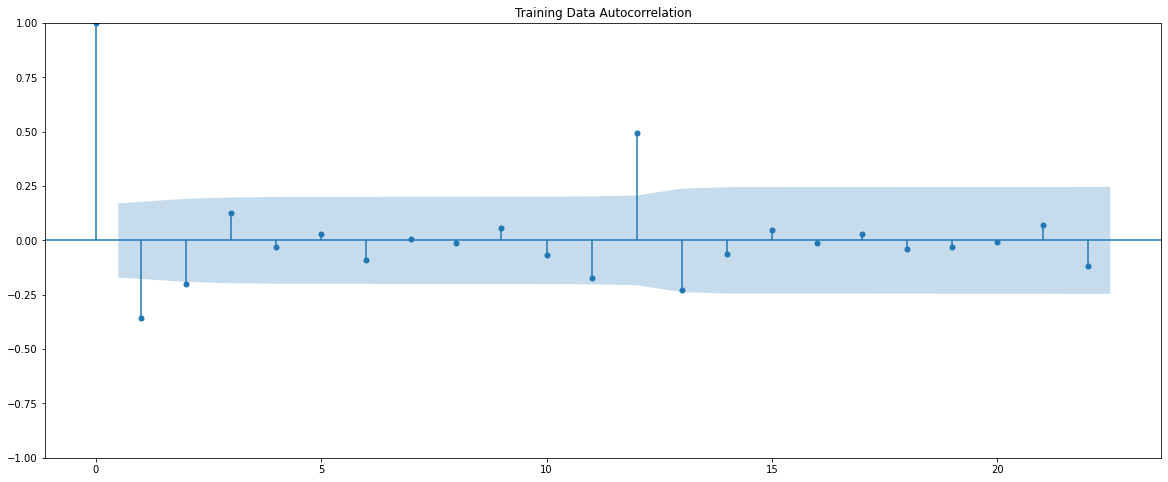

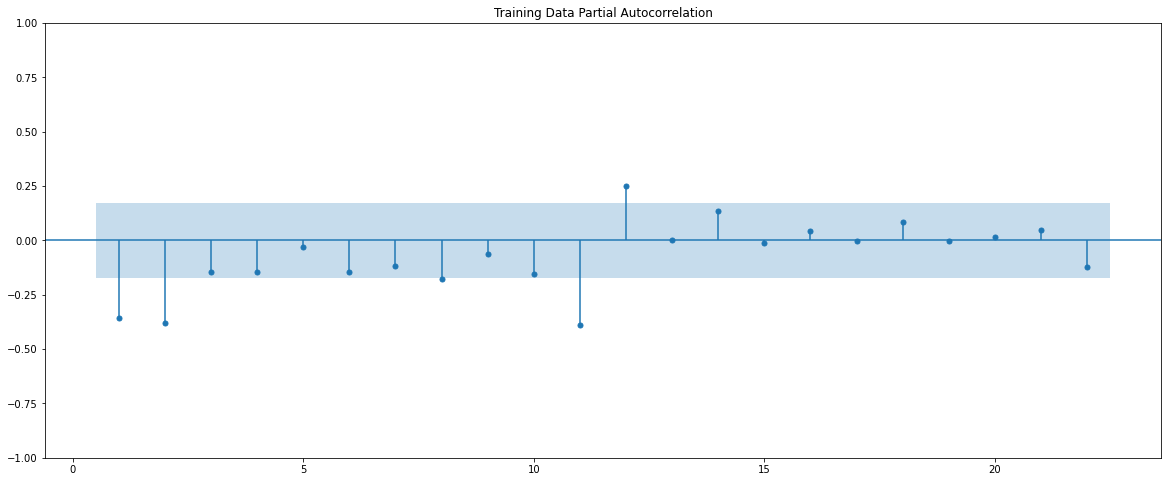

In [1070]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 3 or its multiple e.g. 6. We are taking the p value to be 3 and the q value also to be 3 as the parameters same as the ARIMA model.

- The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0.
- The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.

Remember to check the ACF and the PACF plots only at multiples of 3 (since 3 is the seasonal period).

In [1071]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'],
                                order=(3,1,3),
                                seasonal_order=(0, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(0, 0, 3, 6)   Log Likelihood                -487.076
Date:                           Mon, 21 Mar 2022   AIC                            994.152
Time:                                   00:15:31   BIC                           1021.065
Sample:                               01-31-1980   HQIC                          1005.066
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1010      0.110      0.917      0.359      -0.115       0.317
ar.L2          0.6254      0.115      5.441

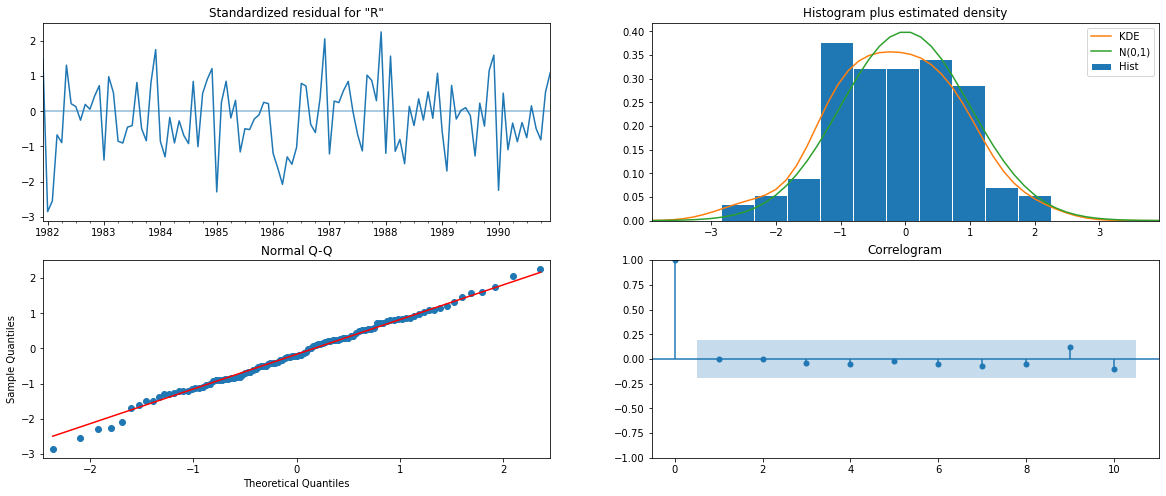

In [1072]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model.

In [1073]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [1074]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 29.719948180970125 
MAPE: 60.37407189356553


In [1075]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(0,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,1)",36.833530,63.920000
"SARIMA(1, 1, 0)(1,0,2)12",64.096436,112.380000
"ARIMA(3,1,3)",36.701328,75.542195
"SARIMA(3,1,3)(0,0,3,6)",29.719948,60.374072


This is where our model building exercise ends.

### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [1076]:
resultsDf = pd.concat([resultsDf,resultsDf_1,resultsDf_2,resultsDf_4,resultsDf_temp_A,resultsDf_temp_B,resultsDf_temp_D,resultsDf_temp_E,])

resultsDf

,RMSE,MAPE,Test RMSE
"ARIMA(2,1,1)",36.833530,63.920000,NaN
"SARIMA(1, 1, 0)(1,0,2)12",64.096436,112.380000,NaN
"ARIMA(3,1,3)",36.701328,75.542195,NaN
"SARIMA(3,1,3)(0,0,3,6)",29.719948,60.374072,NaN
RegressionOnTime,NaN,NaN,57.790054
NaiveModel,NaN,NaN,79.718773
SimpleAverageModel,NaN,NaN,53.460570
"Alpha=0.99,SES",NaN,NaN,36.796241
"Alpha=1,Beta=0.0189:DES",NaN,NaN,15.268944
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",NaN,NaN,14.249661


Thus dataframe has been created with all the models built along their corresponding parameters and the respective RMSE Values on the test data.

### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

### Building the most optimum model on the Full Data.
Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [1077]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(1,1,3),
                                seasonal_order=(3, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  187
Model:             SARIMAX(1, 1, 3)x(3, 0, 3, 6)   Log Likelihood                -680.028
Date:                           Mon, 21 Mar 2022   AIC                           1382.057
Time:                                   00:15:36   BIC                           1416.155
Sample:                               01-31-1980   HQIC                          1395.900
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1339      0.363     -0.369      0.712      -0.845       0.578
ma.L1         -0.5958      0.365     -1.630

#### Note: If we have a scenario where our training data was stationary but our full data was not stationary. We can still use the same parameters as our training data but with adding an appropriate level of differencing or transformation which is needed for the data to be stationary.

### Evaluate the model on the whole data and predict 12 months into the future (till the end of next year).

In [1078]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [1079]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,50.150007,14.999545,20.751439,79.548575
1995-09-30,46.600793,15.538007,16.146859,77.054727
1995-10-31,51.550531,15.567926,21.037957,82.063105
1995-11-30,56.283384,15.619619,25.669493,86.897275
1995-12-31,70.536380,15.667952,39.827759,101.245001


In [1080]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 28.65113896029369


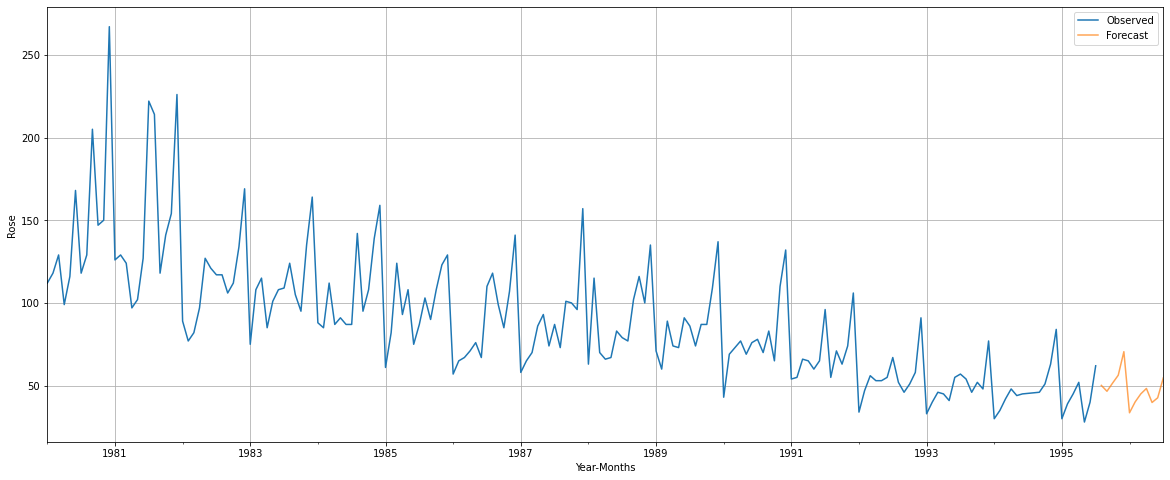

In [1081]:
axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid();

In [1082]:
resultsDf

,RMSE,MAPE,Test RMSE
"ARIMA(2,1,1)",36.833530,63.920000,NaN
"SARIMA(1, 1, 0)(1,0,2)12",64.096436,112.380000,NaN
"ARIMA(3,1,3)",36.701328,75.542195,NaN
"SARIMA(3,1,3)(0,0,3,6)",29.719948,60.374072,NaN
RegressionOnTime,NaN,NaN,57.790054
NaiveModel,NaN,NaN,79.718773
SimpleAverageModel,NaN,NaN,53.460570
"Alpha=0.99,SES",NaN,NaN,36.796241
"Alpha=1,Beta=0.0189:DES",NaN,NaN,15.268944
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",NaN,NaN,14.249661


### 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

### Inference
- The data of different types of wine sales in the 20th century is to be analyzed. These data are from the same company but of different wines. As an analyst, you are tasked to analyze and forecast Wine Sales in the 20th century.
- Therefore at first the data has been read and the time series have been plotted to understand the behaviour of the data.
- We have extracted Month and Year columns in addition to the index as the date columnin addition to the remaining columns of a dataframe which is ‘Rose’.
- The plot of time series when we plot the time series data pertaining to the sales of Rose wine over the years January 1980 through July 1995.
- The trend of the monthly sales spanning over the years is as shown above. It can be observed:
1. 1980 recorded the highest sales for the Rose wine among all years in comparison.
2. Barring 1995 where we have data for only a few months of the year (till July), we noticethat the sales are plateaued since 1981 after experiencing highs in 1980 and 1981.
- The plot shows the behavior of monthly 'Rose Wine Sales' across years where January, February, May, November and December Sales are on a decline in 1994 in comparison to their respective values for the previous year and March, April, June, July, September and October Sales are on an upswingin 1994 in comparison to their respective values for the previous year.
- The average sales of all months over the years also show a pattern of decreasing sales in the 2nd half of the year (July - December).
- There is presence of missing values in between 1994 and 1995.
- Boxplot have been plotted to understand the spread of accidents across different years and within different months across years and also daily.
- Decomposition has been taken place in order to find the trend,seasonality and residual values which is 118 for additive decomposition.
- Later the data has been split into train and test data.
- The exponential smoothing models are built on the training data and evaluate the model using RMSE on the test data which is observed as
1. Simple Exponential Smoothing --- 36.79 (Test RMSE).
2. Double Exponential Smoothing --- 15.26 (Test RMSE).
3. Triple Exponential Smoothing(when alpha=0.25) --- 14.24 (Test RMSE)
4. Triple Exponential Smoothing (when alpha=0.74) ---20.15 (Test RMSE)
- Therefore the model with low test Root mean square error is said to be best model. So Triple exponential smoothing model(when alpha =0.25) performs best.
- Other models including,
1. Linear Regression --- 57.79 (Test RMSE)
2. Naive approach --- 79.71 (Test RMSE)
3. Simple Average --- 53.46 (Test RMSE)
- On comparing the above models, Simple average model has least RMSE which is said to be best model.
- The automated version of the ARIMA/SARIMA model in performed using the lowest Akaike Information Criteria (AIC).
- The predicted RMSE and MAPE for ARIMA/SARIMA iS said to be,
1. ARIMA(2,1,1) ---	36.83(RMSE)	63.920(MAPE)	
2. SARIMA(1, 1, 0)(1,0,2)12 --- 64.096(RMSE)	112.38(MAPE)
3. ARIMA(3,1,3)--- 36.70(RMSE)	75.54(MAPE)
4. SARIMA(3,1,3)(0,0,3,6)--- 29.71(RMSE)	60.37(MAPE)
- On comparing the above models, SARIMA is performed to be the best with least error.

## END